# Data Preprocessing for Implementation of the Stanford Handwriting Algorithm
### Colin McNabb

This notebook is going to serve as a testing environment for the data preprocessing involved with the handwriting production code. Documentation will be done through the markdown cells throughout the notebook. Markdown cells will come before the code cells or blocks of code cells they describe.

The first section will be almost verbatim from the Stanford notebooks. A subdirectory called *modules* has been created with different self-made libraries populated in addition to the characterDefinitions library created by Willet *et al*. Additionally, this notebook uses an updated version of the [Time Warped Principle Component Analysis](https://github.com/ganguli-lab/twpca) algorithm, called [Piecewise Linear Time Warping](https://github.com/ahwillia/affinewarp). This updated warping algorithm does not include any dimensionality reduction, so comparisons with the Stanford warping will yield differences subject to the new hyperparameters (different combinations of hyperparameters will be examined once the preprocessing pipeline is complete).

In [1]:
import os
import numpy as np
import pickle
import scipy.io
import sklearn
import sys
sys.path.append('./utils')
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from characterDefinitions import getHandwritingCharacterDefinitions
from preprocessing import trial_average
from affinewarp import PiecewiseWarping

In [2]:
rootDir = os.path.expanduser('~') + '/handwriting-model/data/handwritingBCIData/'
dataDir = 't5.2019.05.08'
charDef = getHandwritingCharacterDefinitions()

Relevant keys from the *dat* dictionary were extracted for examination. These will eventually be implemented as input arguments into preprocessing functions. The keys taken to be relevant for calculations and warping from the *singleLetters* file included:
* neuralActivityTimeSeries
* clockTimeSeries
* blockNumsTimeSeries

The unique block numbers were extracted, as well as the block-level standard deviation (standard deviation is the only block-level statistical value used in data normalization, the mean used is trial-level).

In [3]:
dat = scipy.io.loadmat(rootDir + 'Datasets/' + dataDir + '/singleLetters.mat')
neuralTimeSeries = dat['neuralActivityTimeSeries']
clockTimeSeries = dat['clockTimeSeries']
blockTimeSeries = dat['blockNumsTimeSeries']
blocks = np.unique(blockTimeSeries)
stdDev = np.std(neuralTimeSeries, axis=0)

# Data Warping

In [16]:
neuralTensor = {key: [] for key in charDef['charList']}
for n in range(len(blocks)):
    block = blocks[n]
    idxs = np.where(blockTimeSeries == block)[0]
    time = clockTimeSeries[idxs]
    neuralData = neuralTimeSeries[idxs, :]
    blockMean = np.mean(neuralData, axis=0)
    for char in charDef['charList']:
        trlIdxs = np.where(dat['characterCues'] == char)[0]
        startCues = np.squeeze(dat['goPeriodOnsetTimeBin'][trlIdxs])
        filter = np.logical_and(startCues >= idxs[0], startCues <= idxs[-1])
        startCues = startCues[filter]
        for cue in startCues:
            trial = np.array(neuralTimeSeries[cue-51:cue+150, :]).astype(float)
            trial -= blockMean
            trial = trial / stdDev
            neuralTensor[char].append(trial)

Loss improvement: 6.11%: 100%|███████████████████████| 50/50 [00:01<00:00, 27.25it/s]


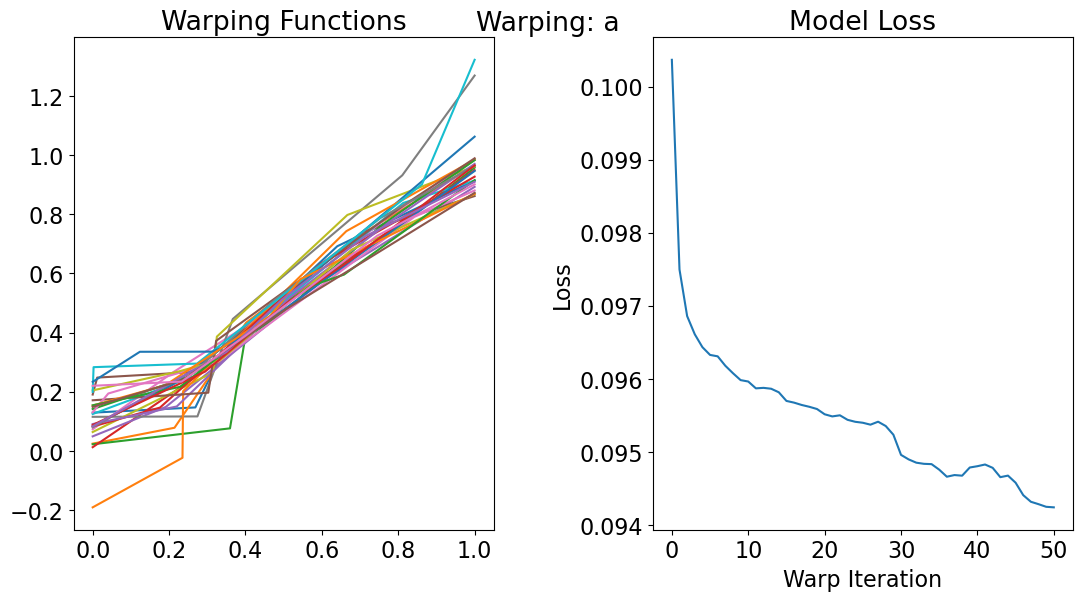

Loss improvement: 6.31%: 100%|███████████████████████| 50/50 [00:01<00:00, 26.75it/s]


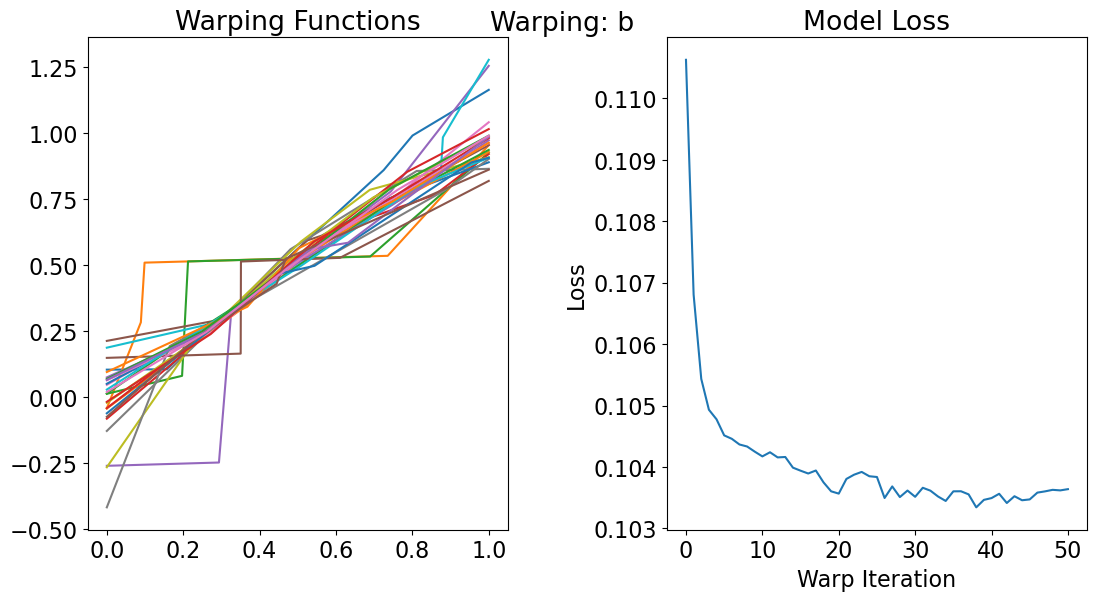

Loss improvement: 5.80%: 100%|███████████████████████| 50/50 [00:01<00:00, 25.79it/s]


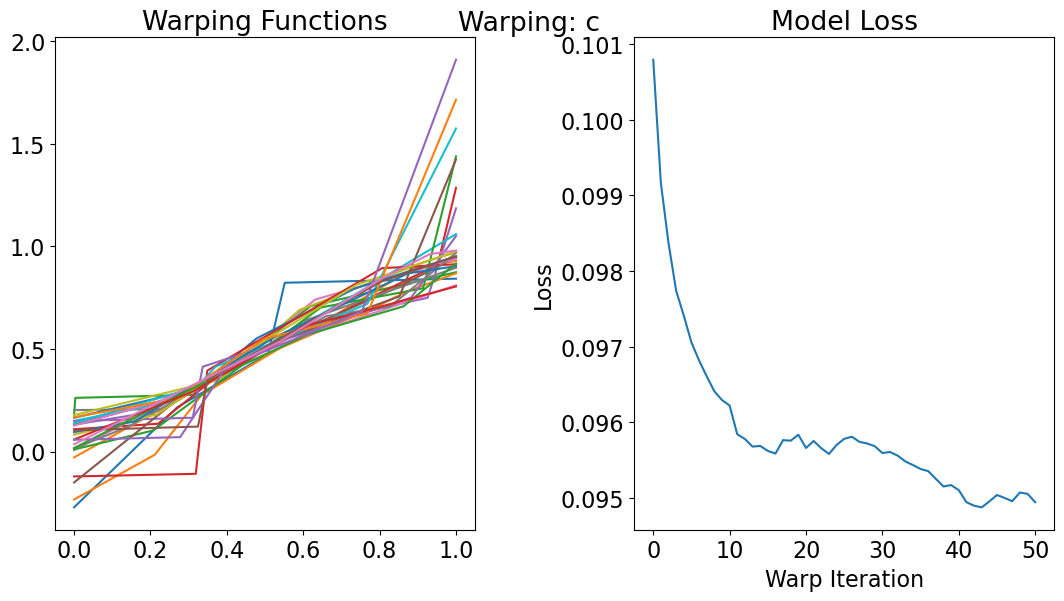

Loss improvement: 7.06%: 100%|███████████████████████| 50/50 [00:01<00:00, 25.35it/s]


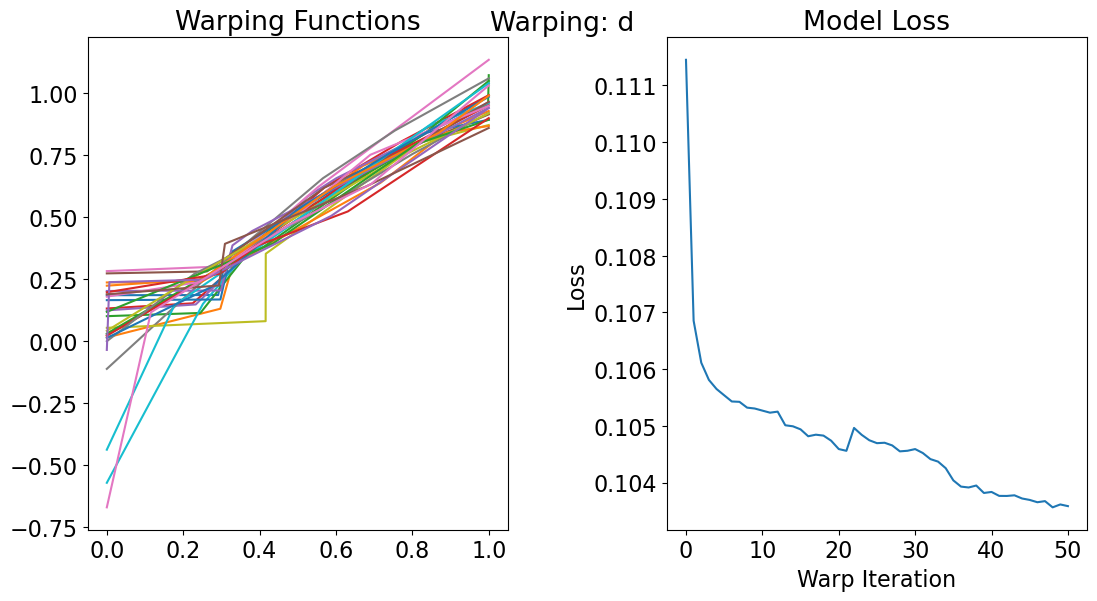

Loss improvement: 6.50%: 100%|███████████████████████| 50/50 [00:02<00:00, 24.93it/s]


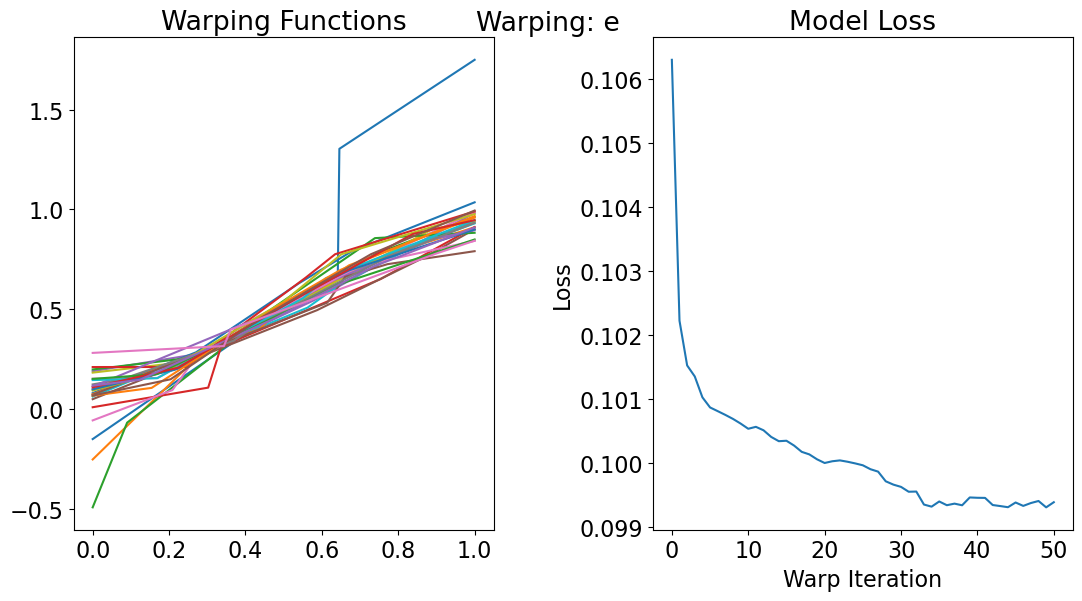

Loss improvement: 6.28%: 100%|███████████████████████| 50/50 [00:01<00:00, 25.03it/s]


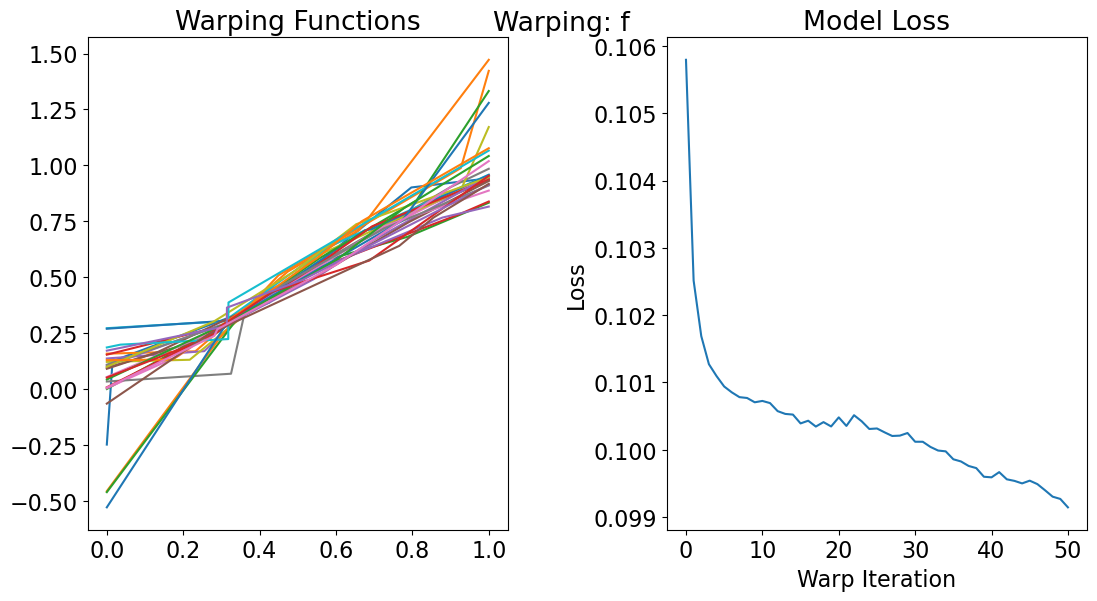

Loss improvement: 9.01%: 100%|███████████████████████| 50/50 [00:02<00:00, 24.93it/s]


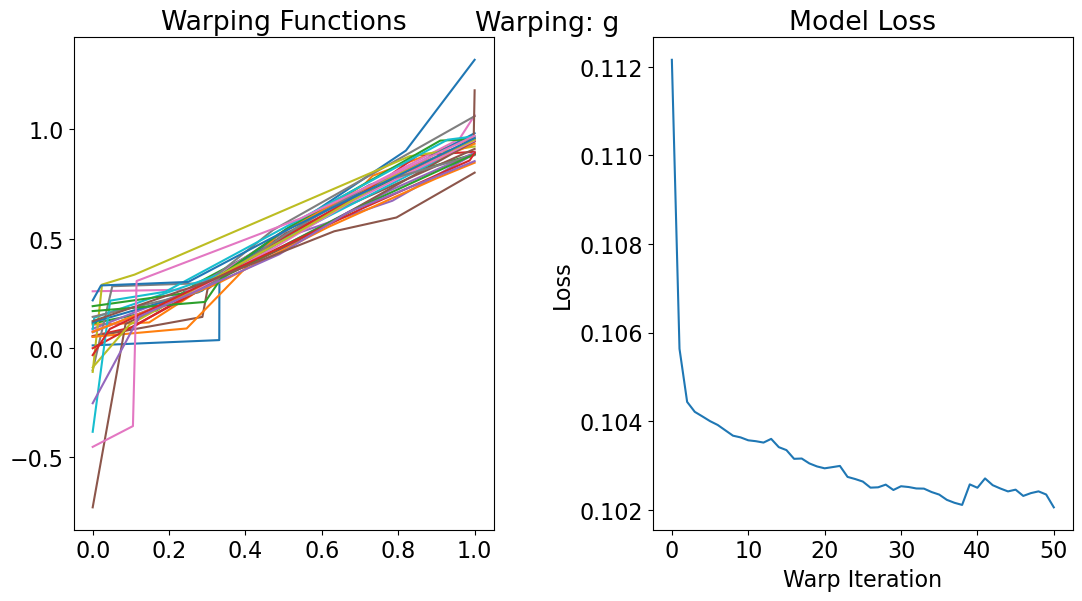

Loss improvement: 5.74%: 100%|███████████████████████| 50/50 [00:01<00:00, 25.08it/s]


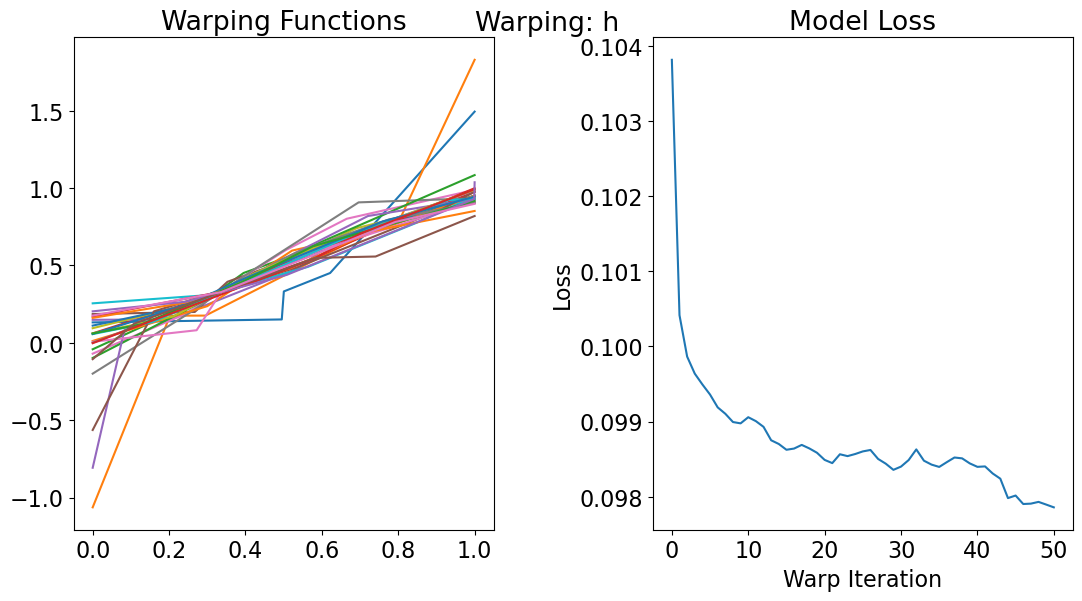

Loss improvement: 4.87%: 100%|███████████████████████| 50/50 [00:01<00:00, 25.34it/s]


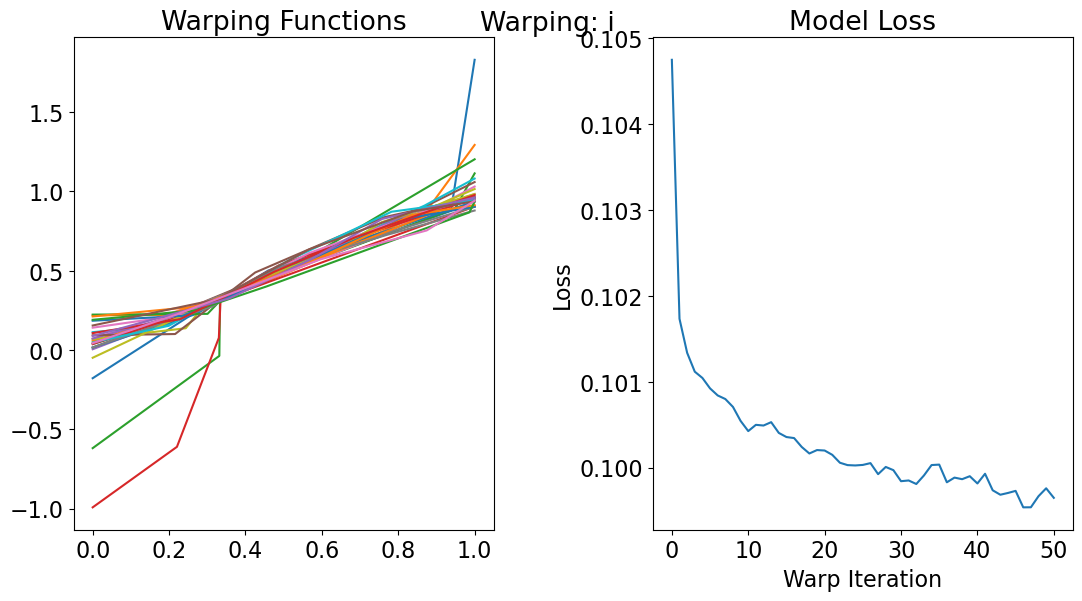

Loss improvement: 31.00%: 100%|██████████████████████| 50/50 [00:02<00:00, 24.78it/s]


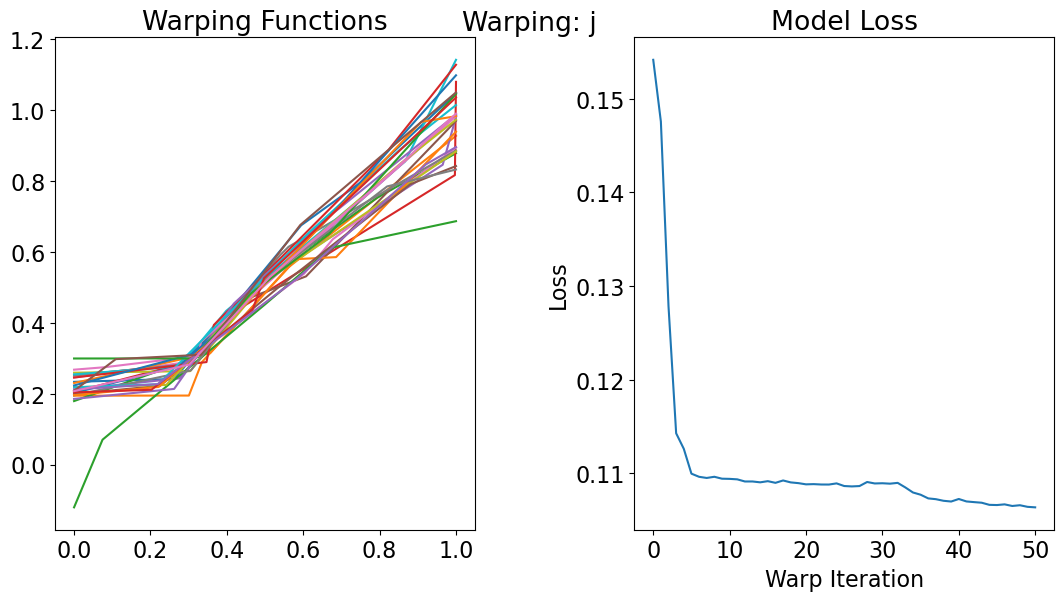

Loss improvement: 8.71%: 100%|███████████████████████| 50/50 [00:02<00:00, 24.79it/s]


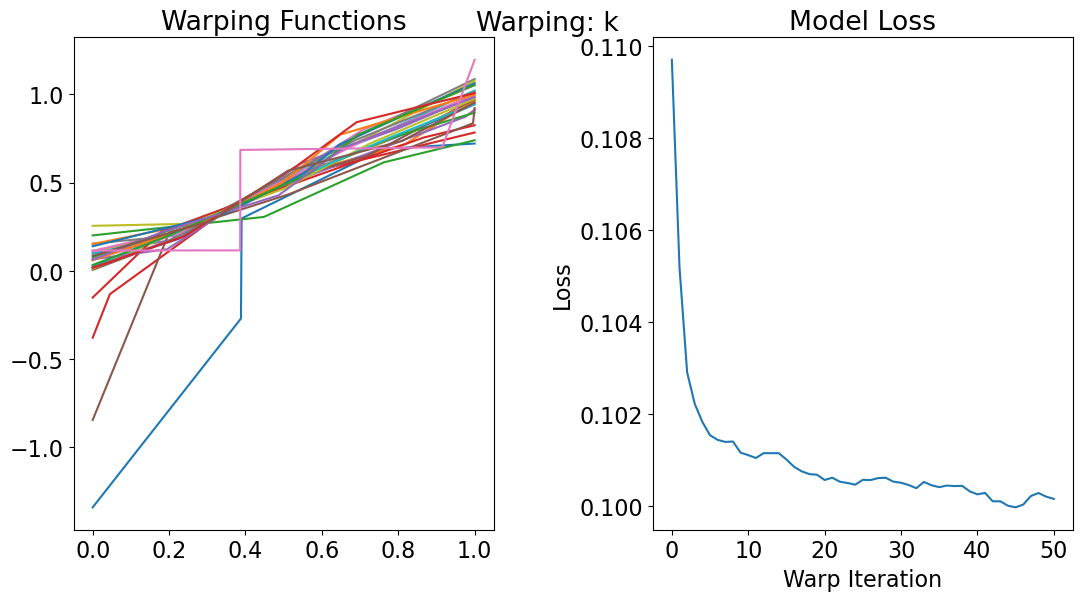

Loss improvement: 13.05%: 100%|██████████████████████| 50/50 [00:02<00:00, 24.94it/s]


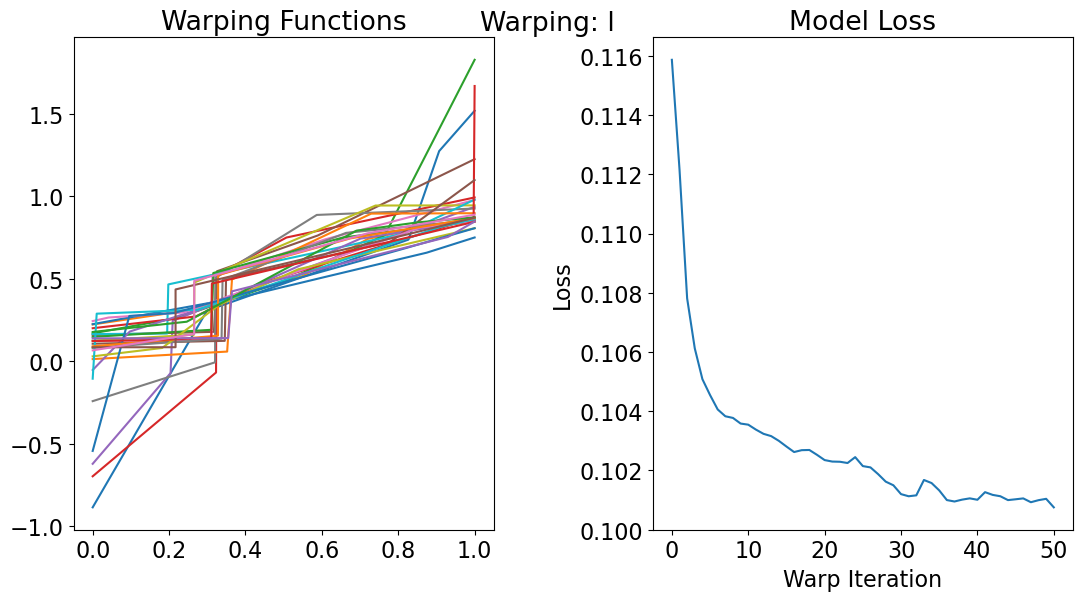

Loss improvement: 5.78%: 100%|███████████████████████| 50/50 [00:02<00:00, 23.86it/s]


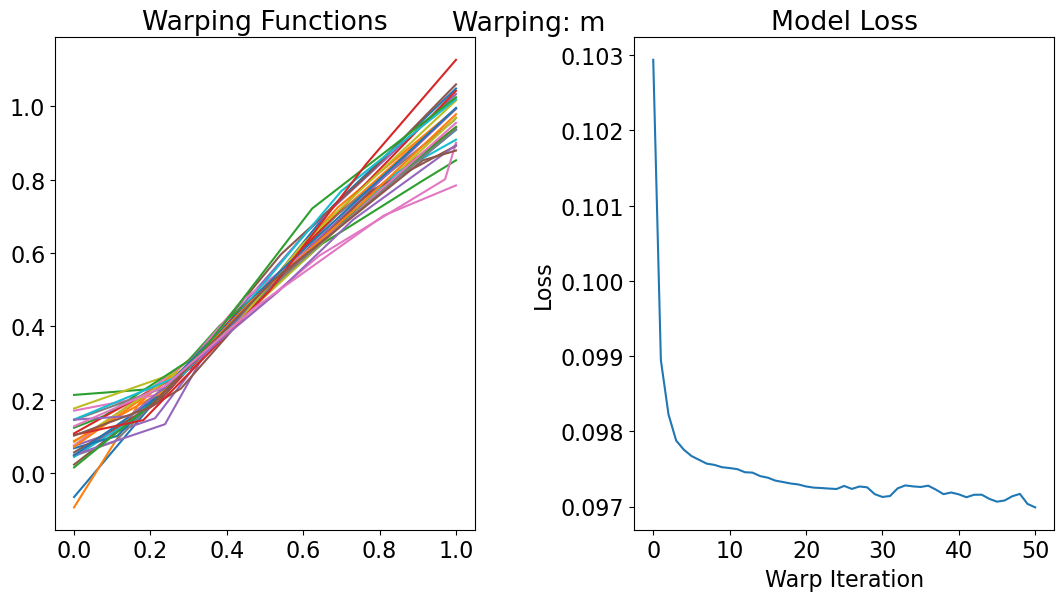

Loss improvement: 5.83%: 100%|███████████████████████| 50/50 [00:02<00:00, 23.55it/s]


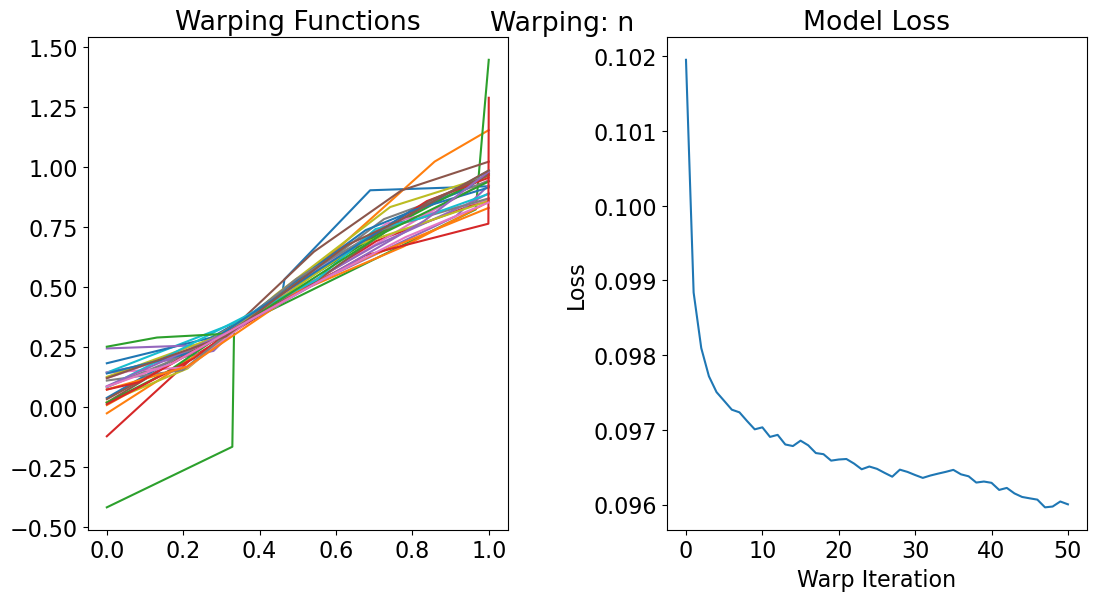

Loss improvement: 7.18%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.87it/s]


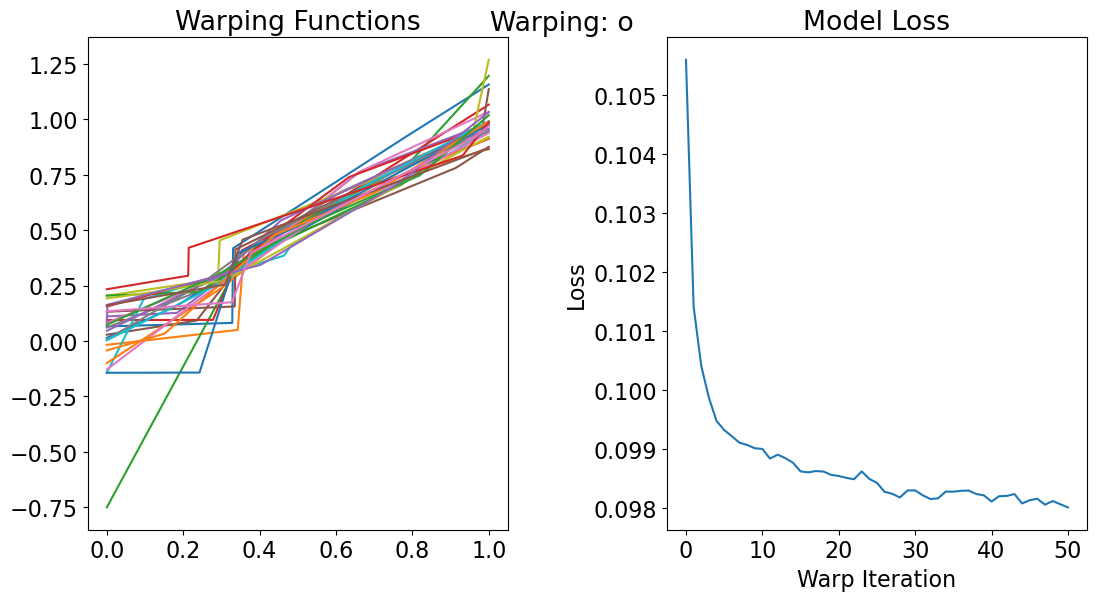

Loss improvement: 5.64%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.51it/s]


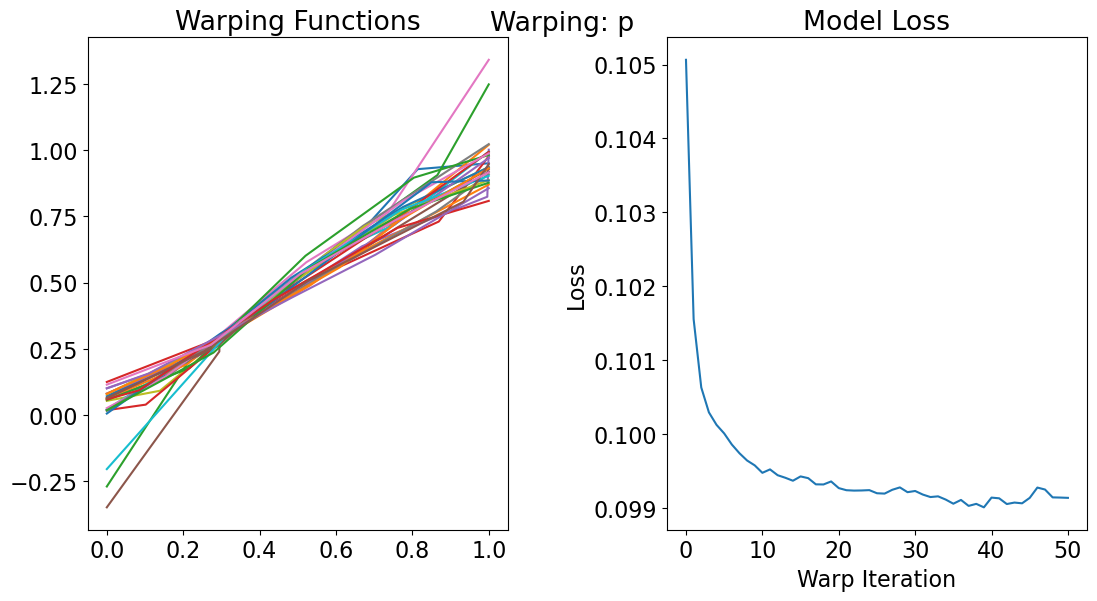

Loss improvement: 6.80%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.03it/s]


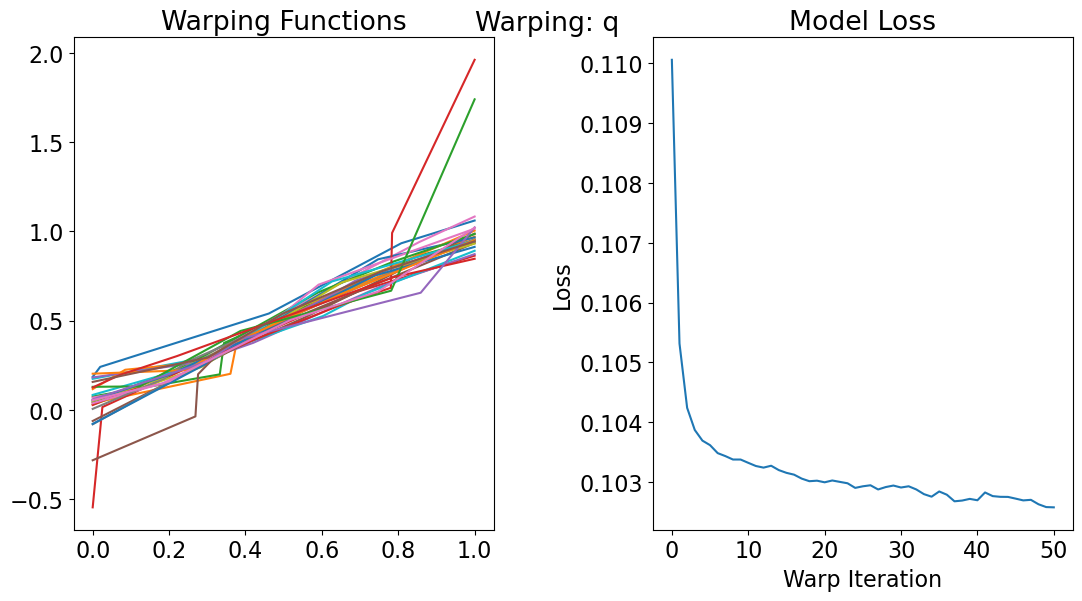

Loss improvement: 4.56%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.65it/s]


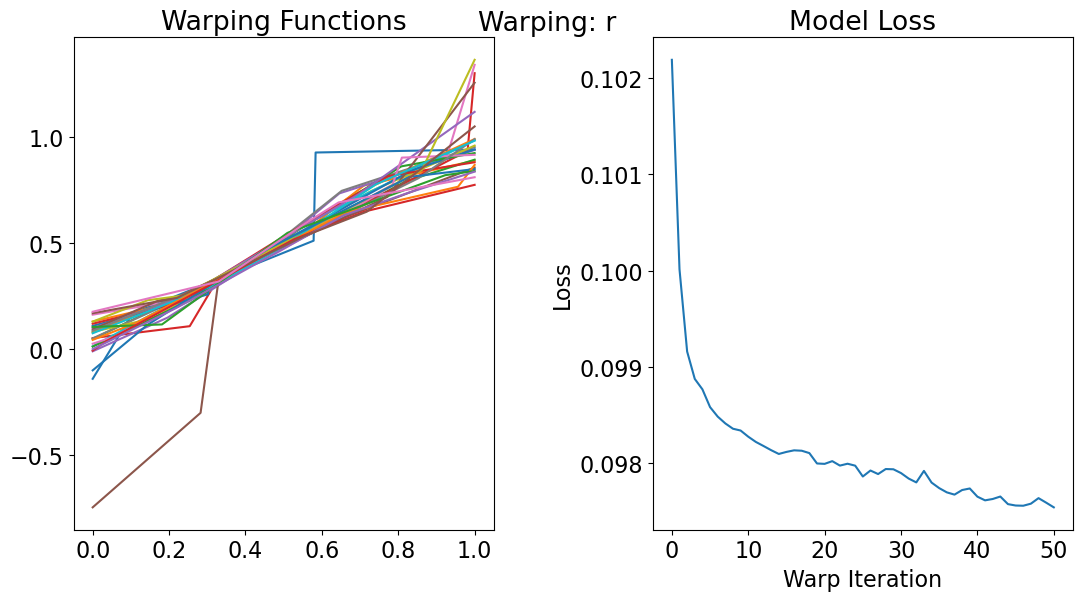

Loss improvement: 7.07%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.13it/s]


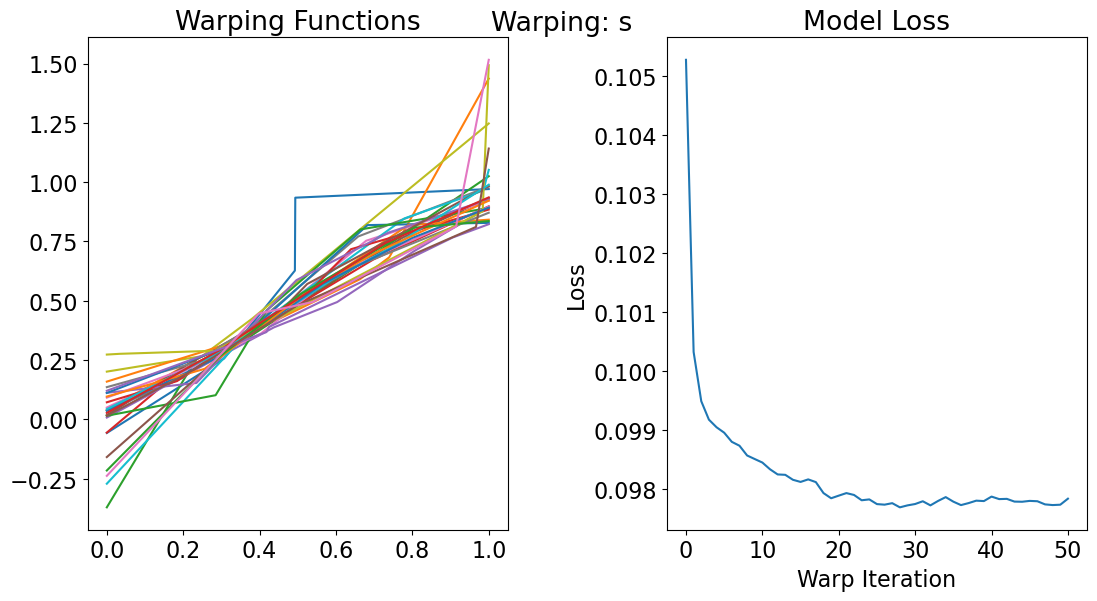

Loss improvement: 4.33%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.18it/s]


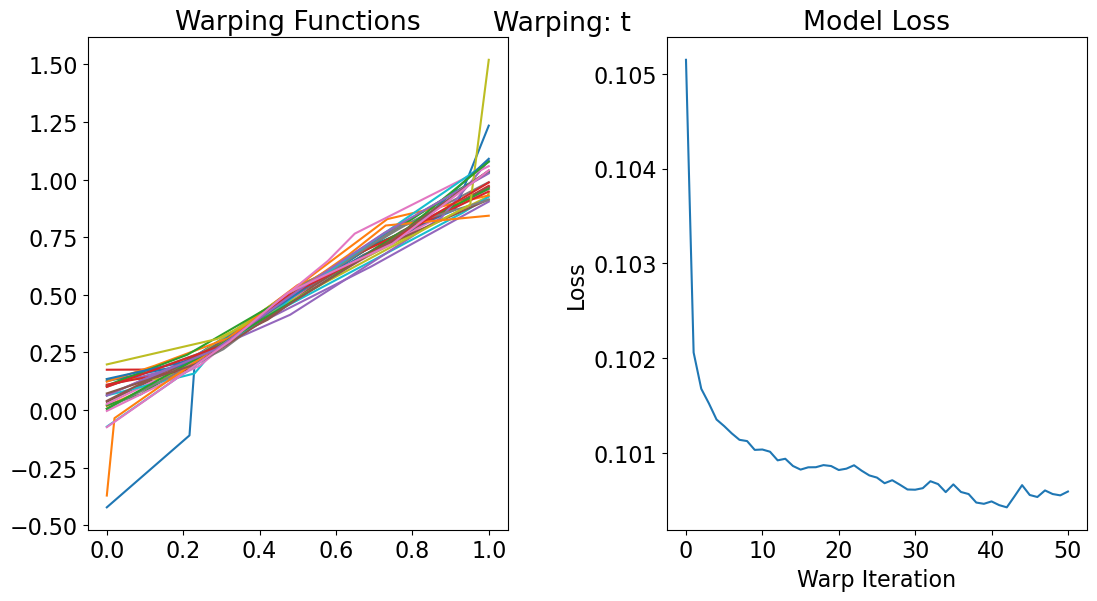

Loss improvement: 5.11%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.65it/s]


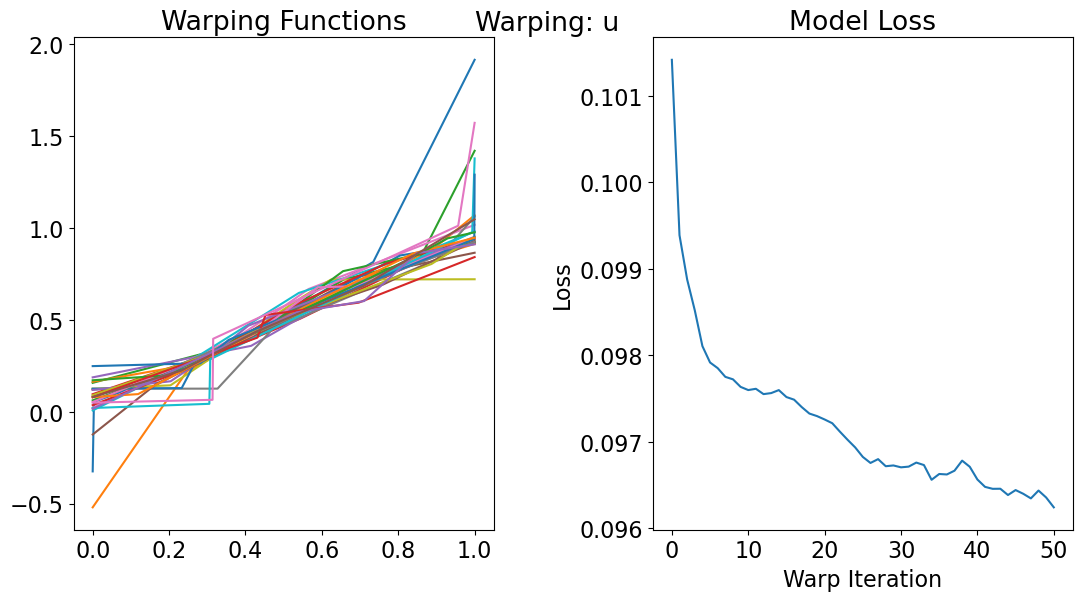

Loss improvement: 4.04%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.18it/s]


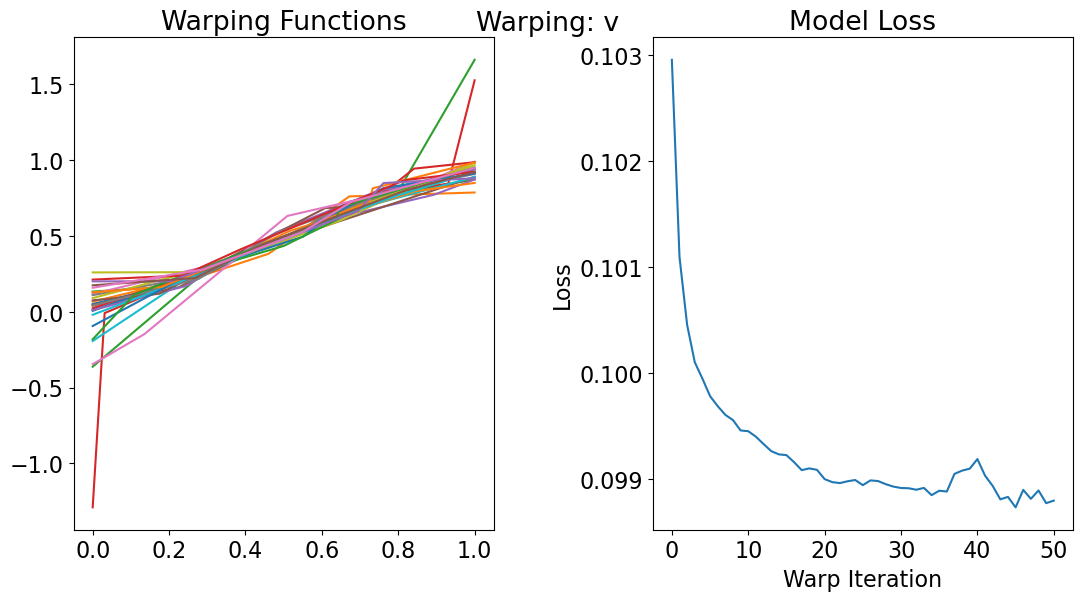

Loss improvement: 6.23%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.36it/s]


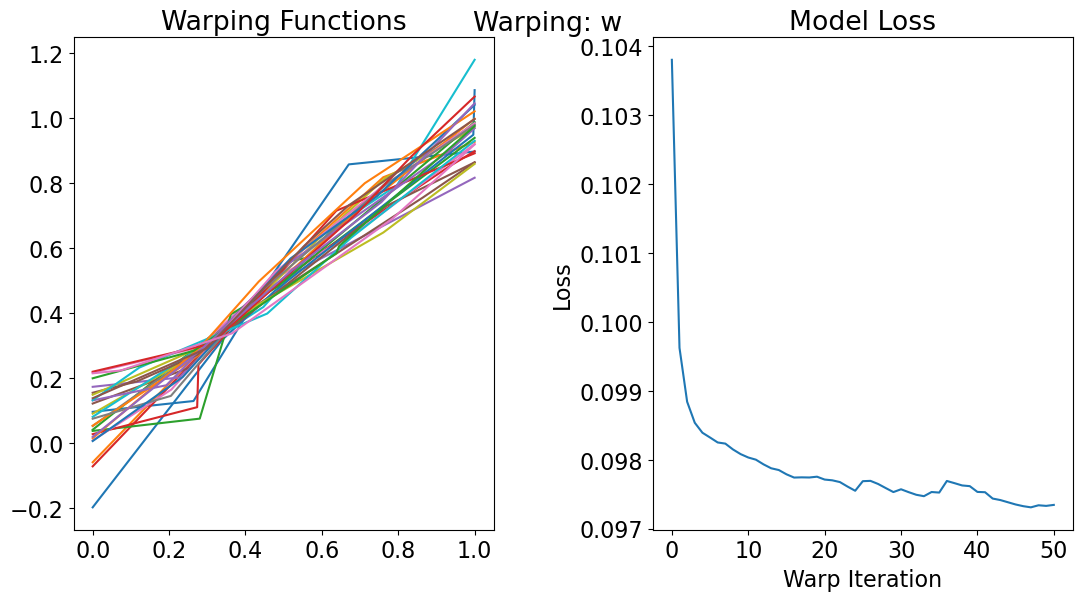

Loss improvement: 5.40%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.30it/s]


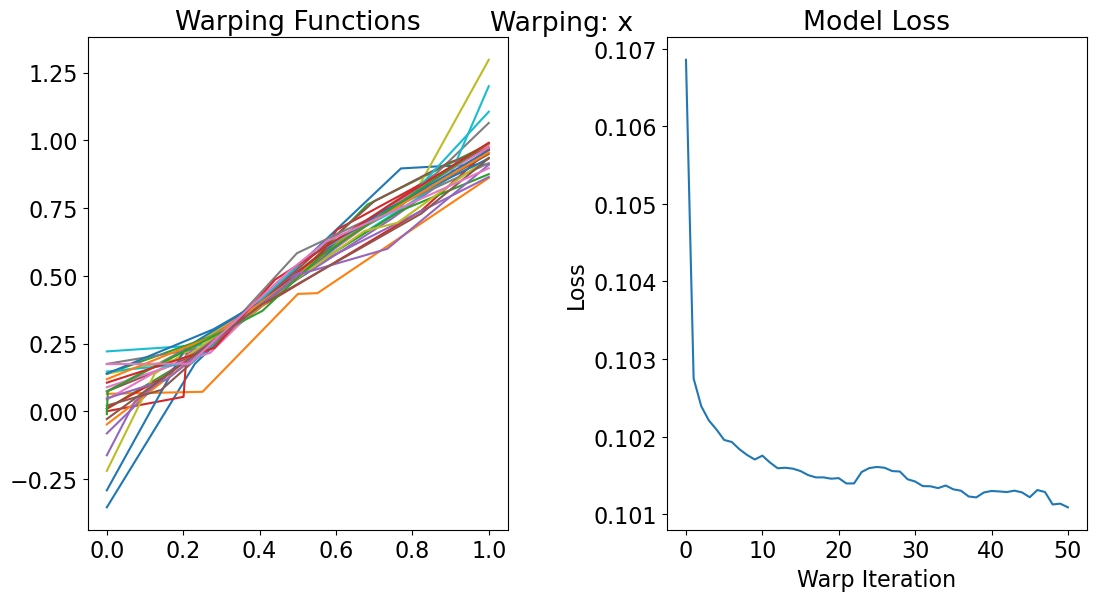

Loss improvement: 7.54%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.09it/s]


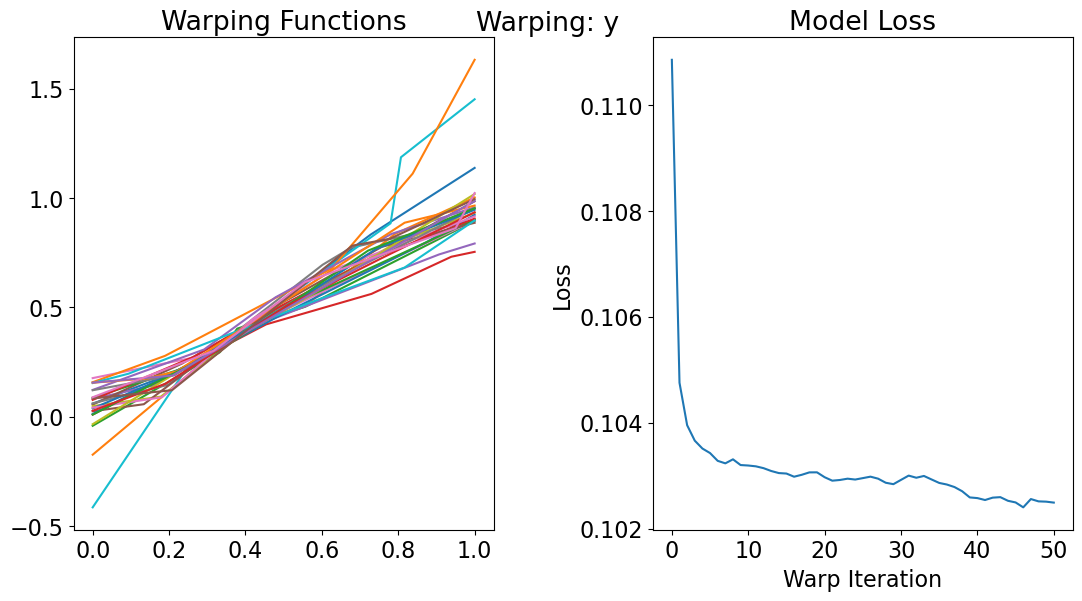

Loss improvement: 6.74%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.08it/s]


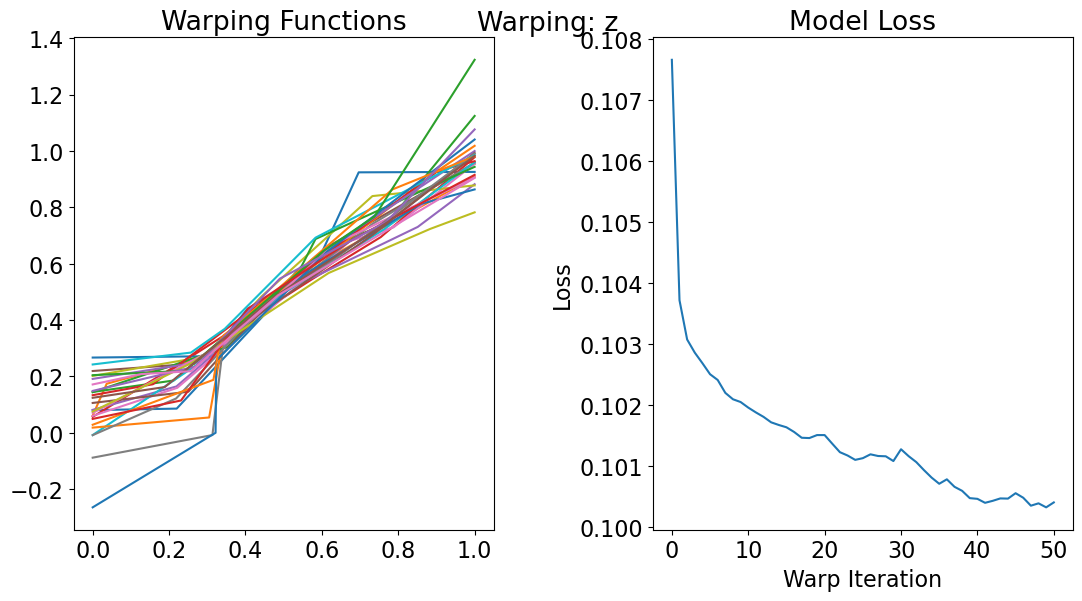

Loss improvement: 5.23%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.14it/s]


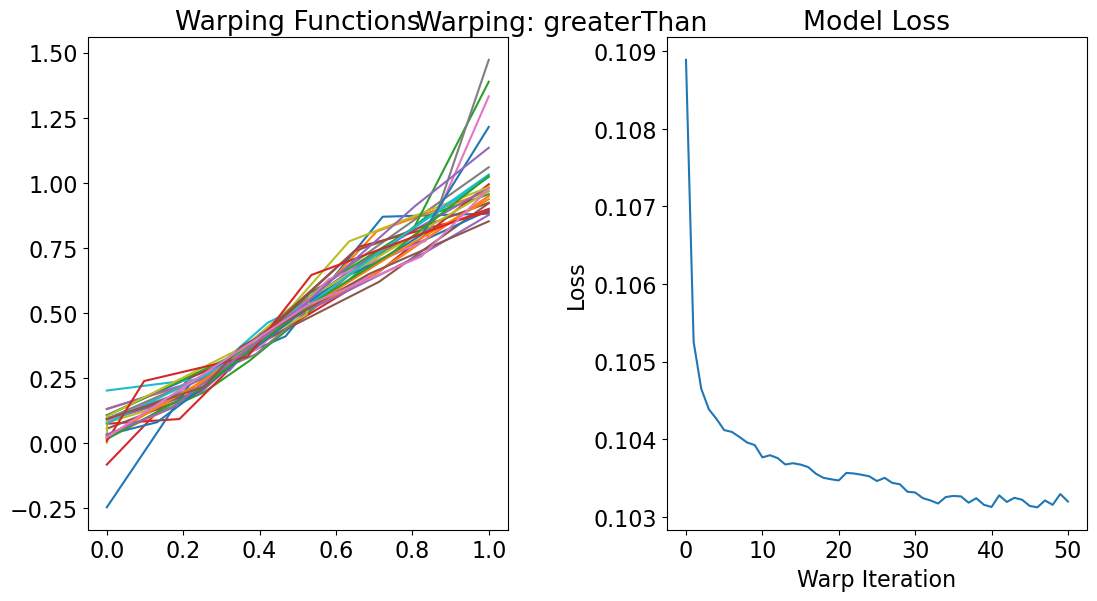

Loss improvement: 10.25%: 100%|██████████████████████| 50/50 [00:02<00:00, 22.01it/s]


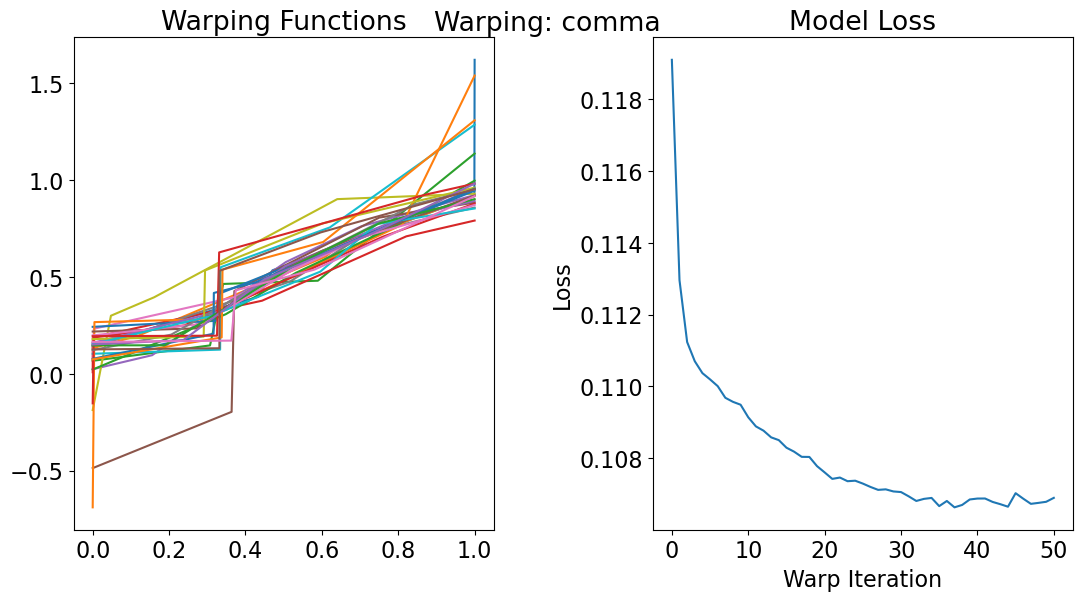

Loss improvement: 9.30%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.26it/s]


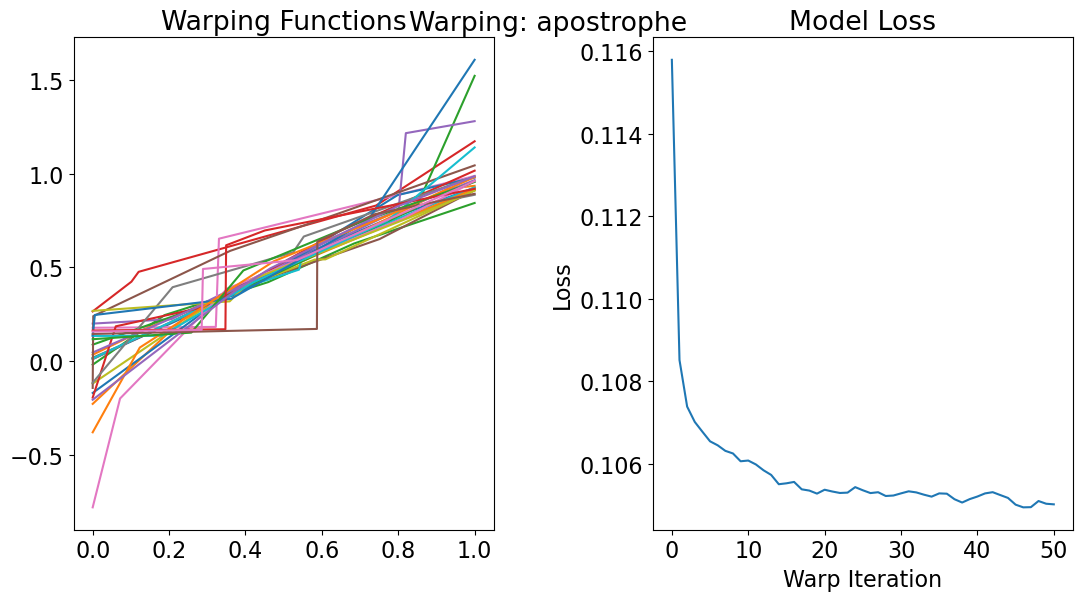

Loss improvement: 5.28%: 100%|███████████████████████| 50/50 [00:02<00:00, 21.81it/s]


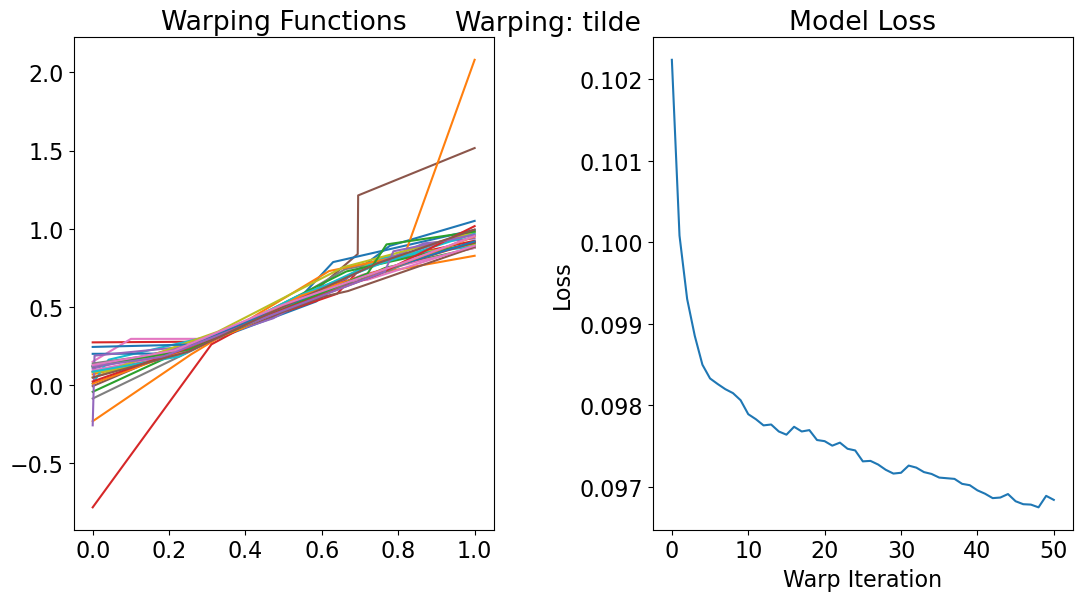

Loss improvement: 7.91%: 100%|███████████████████████| 50/50 [00:02<00:00, 22.08it/s]


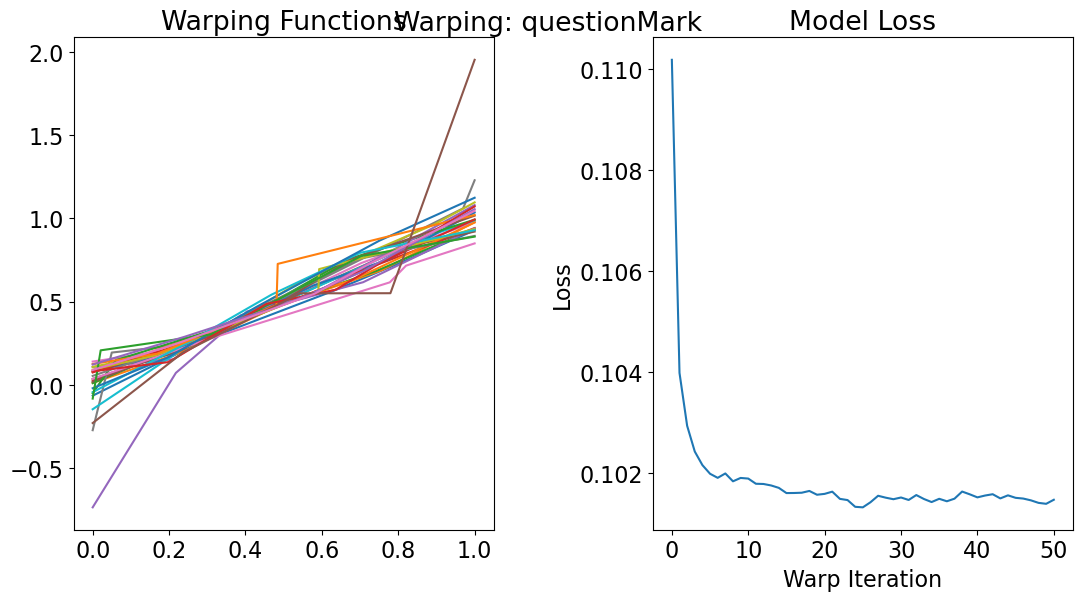

In [25]:
model = PiecewiseWarping(n_knots=3, warp_reg_scale=1e-6,
                         smoothness_reg_scale=20)
warpedTensor = {key: [] for key in charDef['charList']}
neuralTensor_smooth = {key: [] for key in charDef['charList']}
warpedTensor_smooth = {key: [] for key in charDef['charList']}
for char in charDef['charList']:
    smoothed_spikes = scipy.ndimage.gaussian_filter1d(
        neuralTensor[char], 3.0, axis=1)
    neuralTensor_smooth[char] = smoothed_spikes
    model.fit(smoothed_spikes, iterations=50, warp_iterations=200)
    warped_spikes = model.transform(np.array(neuralTensor[char]))
    warpedTensor[char] = warped_spikes
    smoothed_warped_spikes = scipy.ndimage.gaussian_filter1d(
        warped_spikes, 3.0, axis=1)
    warpedTensor_smooth[char] = smoothed_warped_spikes
    # fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.tight_layout(pad = 1)
    fig.set_size_inches(12, 6)
    fig.suptitle(f'Warping: {char}')
    ax1.plot(model.x_knots.T, model.y_knots.T)
    ax1.set_title('Warping Functions')
    # ax2.plot(smoothed_spikes[0])
    # ax3.plot(smoothed_warped_spikes[0])
    # ax4.plot(model.loss_hist)
    ax2.plot(model.loss_hist)
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Warp Iteration')
    ax2.set_ylabel('Loss')
    plt.show()

This is a sanity check on the dimensions of the output neuralTensors. They were compared to the Stanford neuralBlocks (also sized 27 x 201 x 192).

In [6]:
print(np.array(warpedTensor['a']).shape)

(27, 201, 192)


The outputs are given from the trial_average function in order to determine that the trial averaged tensor has the same shape as a single character recording tensor (192 x 201) multiplied by the number of character (31, so 192 x (201x31)).

In [7]:
print('Raw Spikes')
pca_array = trial_average(neuralTensor, charDef['charList'])

Raw Spikes
Processed character 'a', shape=(192, 201)
Processed character 'b', shape=(192, 201)
Processed character 'c', shape=(192, 201)
Processed character 'd', shape=(192, 201)
Processed character 'e', shape=(192, 201)
Processed character 'f', shape=(192, 201)
Processed character 'g', shape=(192, 201)
Processed character 'h', shape=(192, 201)
Processed character 'i', shape=(192, 201)
Processed character 'j', shape=(192, 201)
Processed character 'k', shape=(192, 201)
Processed character 'l', shape=(192, 201)
Processed character 'm', shape=(192, 201)
Processed character 'n', shape=(192, 201)
Processed character 'o', shape=(192, 201)
Processed character 'p', shape=(192, 201)
Processed character 'q', shape=(192, 201)
Processed character 'r', shape=(192, 201)
Processed character 's', shape=(192, 201)
Processed character 't', shape=(192, 201)
Processed character 'u', shape=(192, 201)
Processed character 'v', shape=(192, 201)
Processed character 'w', shape=(192, 201)
Processed character 'x'

Principal Component Analysis (PCA) was done to compare results of warping to the warped results from the Stanford paper. As of this time, the results are different. This is partly because the Stanford paper used the time warped PCA library and here I used the updated affine warp library (see introduction cell for links to both libraries). The updated library uses different hyperparameters and will require some fine tuning once the general processing pipeline is laid out.

In [8]:
n_components = 10
pca = PCA(n_components=n_components)
print(pca_array.shape)
pca.fit(pca_array.T)
components = pca.transform(pca_array.T)
print(f"PCA components shape: {components.shape}")

(192, 6231)
PCA components shape: (6231, 10)


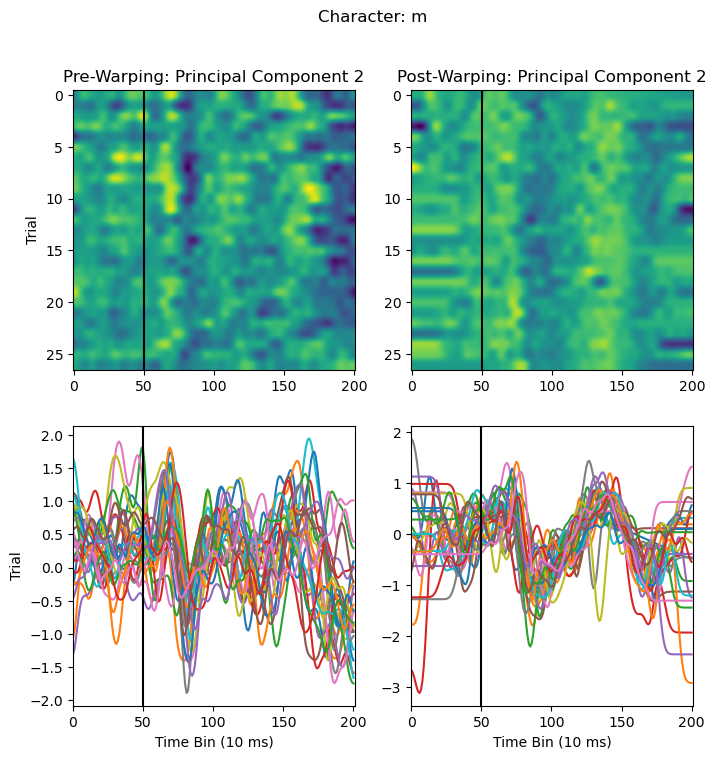

In [9]:
view_dim = 1
sample_char = 'm'
pre_warp = np.array(neuralTensor_smooth[sample_char])
post_warp = np.array(warpedTensor_smooth['e'])
dims = pre_warp.shape
pre_warp = np.reshape(pre_warp, (dims[0]*dims[1], dims[2]))
post_warp = np.reshape(post_warp, (dims[0]*dims[1], dims[2]))

pre_warp_reduced = pca.transform(pre_warp)
post_warp_reduced = pca.transform(post_warp)
pre_warp_reduced = np.reshape(pre_warp_reduced, (dims[0], dims[1], n_components))
post_warp_reduced = np.reshape(post_warp_reduced, (dims[0], dims[1], n_components))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221)
ax.imshow(pre_warp_reduced[:, :, view_dim])
ax.set_aspect('auto')
ax.axvline(x=50, color='black')
ax.set_ylabel('Trial')
ax.set_title(f'Pre-Warping: Principal Component {view_dim + 1}')

ax = fig.add_subplot(222)
ax.imshow(post_warp_reduced[:, :, view_dim])
ax.set_aspect('auto')
ax.axvline(x=50, color='black')
ax.set_title(f'Post-Warping: Principal Component {view_dim + 1}')
plt.suptitle(f'Character: {sample_char}')

ax = fig.add_subplot(223)
ax.plot(pre_warp_reduced[:, :, view_dim].T)
ax.axvline(x=50, color='black')
ax.set_xlabel('Time Bin (10 ms)')
ax.set_ylabel('Trial')
ax.set_xlim([0, 201])

ax = fig.add_subplot(224)
ax.plot(post_warp_reduced[:, :, view_dim].T)
ax.axvline(x=50, color='black')
ax.set_xlabel('Time Bin (10 ms)')
ax.set_xlim([0, 201])

plt.show()

The warped tensor dictionary was saved out as a binary file to allow it to be loaded into different notebooks and for general portability. The processing will continue in this notebook, however if it gets to be too long it could be broken into multiple notebooks.

In [10]:
with open("data/warpedTensor.pkl", "wb") as f:
    pickle.dump(warpedTensor, f)

# Data Labeling

The data labeling step consists of generating a Hidden Markov Model (HMM) to perform forced-alignment. With this method, the HMM is used to infer which character is being written at each timestep. The state transition matrix defined an orderly march through each character; each charcter had the same number of states as it did time bins. The emission probabilities were determined from the firing-rate vectors from the corresponding time bin of the character template.

In [11]:
sentenceData = scipy.io.loadmat(rootDir + 'Datasets/' + dataDir + '/sentences.mat')
sentenceIdx = 15
sentence = sentenceData['sentencePrompt'][sentenceIdx,0][0]
print(sentenceData.keys())
print(sentenceData['neuralActivityCube'].shape)
print(sentenceData['sentencePrompt'].shape)
print(sentenceData['neuralActivityTimeSeries'].shape)
sentenceLength = np.squeeze(sentenceData['numTimeBinsPerSentence'][sentenceIdx])
print(sentenceLength)
startIdx = np.sum(sentenceData['numTimeBinsPerSentence'][0:sentenceIdx])
print(startIdx)
sampleSentenceData = sentenceData['neuralActivityTimeSeries'][startIdx:startIdx+sentenceLength, :]
print(sampleSentenceData.shape)

dict_keys(['__header__', '__version__', '__globals__', 'neuralActivityCube', 'sentencePrompt', 'intendedText', 'numTimeBinsPerSentence', 'sentenceCondition', 'sentenceBlockNums', 'excludedSentences', 'neuralActivityTimeSeries', 'clockTimeSeries', 'blockNumsTimeSeries', 'blockList', 'blockStartDates', 'goCueOnsetTimeBin', 'delayCueOnsetTimeBin', 'sentenceEndTimeBin', 'arrayGeometryMap', 'rnn_charProbTimeSeries', 'rnn_newCharTimeSeries', 'rnn_decodedCharTimes', 'rnn_decodedText', 'rnn_charMapASCII'])
(102, 10669, 192)
(102, 1)
(599319, 192)
5080
82316
(5080, 192)


The first step in data labeling is to create spatio-temporal templates for each character. This is done by averaging together the time-warped character data across the trials. These templates are denoised through PCA and saved. The authors of the Stanford paper ignored the first 100 ms of data after the "go" cue was given. Timepoint 50 corresponded to the "go" cue, so the templates start at time point 59; the length of each sentence, in timepoints, was determined by observation (by the Stanford researchers) and saved into the *characterDefinitions* file.

In [12]:
templates = {}
for char, charAbbr, thisCharLen in zip(charDef['charList'], charDef['charListAbbr'], charDef['charLen']):
    #Average the time-warped data across trials and smooth it
    neuralCube = warpedTensor[char].copy()
    neuralCube = np.nanmean(neuralCube, axis=0)
    neuralCube = scipy.ndimage.gaussian_filter1d(neuralCube, 4.0, axis=0)
    
    #Select the time window of neural activity to use for this template (time step 50 is the 'go' cue)
    neuralCube = neuralCube[59:(59+thisCharLen+1),:]
    
    #Use PCA to denoise this template by keeping only the top 10 dimensions
    pcaModel = PCA(n_components=10)
    pcaModel.fit(neuralCube)
    lowRankTemplate = pcaModel.inverse_transform(pcaModel.transform(neuralCube))
    
    templates[charAbbr] = lowRankTemplate

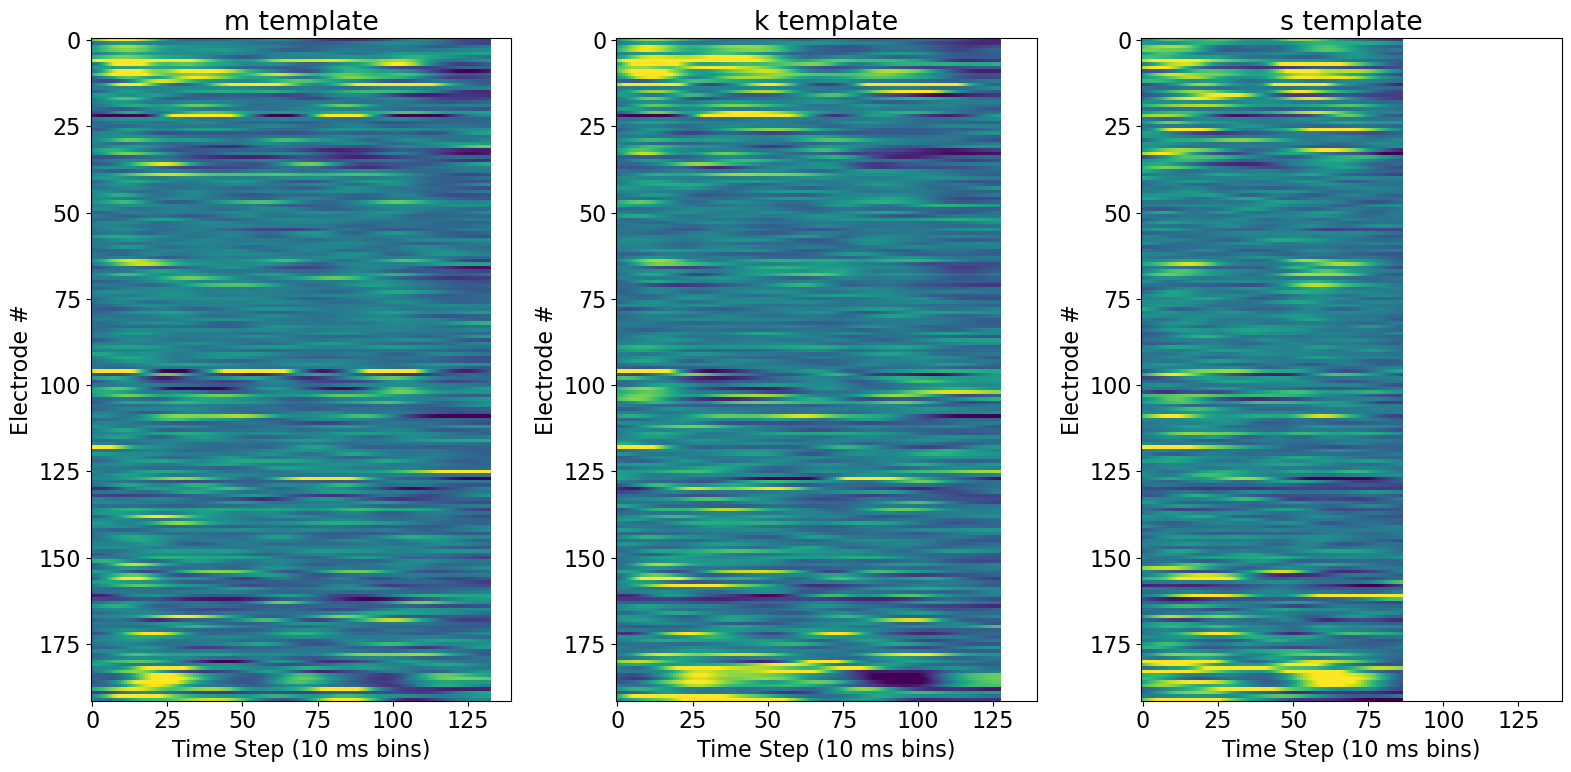

In [13]:
exampleChars = ['m','k','s']

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,8))

for char, plotIdx in zip(exampleChars, range(len(exampleChars))):
    plt.subplot(1,3,plotIdx+1)
    
    #Equalize the size of each display template so that they display with the same aspect ratios.
    tmp = np.zeros([192, 140])
    tmp[:] = np.nan
    tmp[:,0:templates[char].shape[0]] = np.transpose(templates[char])

    plt.imshow(tmp,clim=[-0.4, 0.6],aspect='auto')
    
    plt.title(char + ' template')
    plt.xlabel('Time Step (10 ms bins)')
    plt.ylabel('Electrode #')
    
plt.gcf().tight_layout()
plt.show()

In the Stanford paper, the templates were then condensed down into 50 ms time bins by averaging together every 5 bins. Here, I elected not to perform this reduction in order to reduce the number of preprocessing steps that need to be done. This might be returned to in the future if it is deemed necessary or desirable for system performance.

In [33]:
print(sentence)
print(templates.keys())

so>far,>i>haven't>had>a>lot>of>luck>with>that~
dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '>', ',', "'", '~', '?'])


In [112]:
#Now we construct the HMM state transitions & emission probabilities for our example sentence.
#Each HMM state corresponds to a piece of a character in the sentence.

#The following parameters define state transition probabilities
blankProb = 0.1 #probability of entering a blank state at the end of a character
stayProb = 0.20 #probability of persisting in the same state
skipProb = 0.20 #probability of skipping two states ahead (instead of simply advancing to the next one)

#First, compute the total number of states in the HMM (nStates) and the state at which each letter begins (letterStartIdx)
nStates = 0
letterStartIdx = np.zeros(len(sentence))
for x in range(len(sentence)):
    letterStartIdx[x] = nStates
    nStates = nStates + np.floor(templates[sentence[x]].shape[0]) + 1 #+1 for blank state at the end of each character

nStates = (nStates + 1).astype(np.int32) #+1 for blank state at the beginning of the sentence

letterStartIdx += 1 #adjust letterStartIdx to account for the blank state at the beginning of the sentence
letterStartIdx = letterStartIdx.astype(np.int32)

#Next, define the state transitions and emission distributions.
#The A matrix defines the state transitions (entry [i,j] is the probability of moving from i->j).
#The B matrix defines the emission probabilities (by defining mean firing rates for each state). One row for each state.
A_hmm = np.zeros([nStates, nStates])
B_hmm = np.zeros([nStates, templates[sentence[0]].shape[1]]) 

#For each state, store which character it belongs to (stateLabels) and that character's position in the sentence (stateLabelsSeq)
stateLabels = np.zeros([nStates,1], dtype='str')
stateLabelsSeq = np.zeros([nStates,1])
nChars = len(templates)

#loop through each character in the sentence and add that character's states to the HMM
for x in range(len(sentence)):  
    #nBins is the number of HMM states in this character
    nBins = np.floor(templates[sentence[x]].shape[0]).astype(np.int32)
    currentState = letterStartIdx[x]
    
    #idxInTemplate keeps track of where we are in the character template for each HMM state
    idxInTemplate = np.array([0]).astype(np.int32)

    #loop through each HMM state belonging to the current character
    for b in range(nBins):
        #define the mean firing rates for this state
        meanRates = np.mean(templates[sentence[x]][idxInTemplate,:], axis=0)
        B_hmm[currentState, :] = meanRates
        
        #define which character and position this state belongs to
        stateLabels[currentState] = sentence[x]
        stateLabelsSeq[currentState] = x
        
        #define transition probabilities for this state
        A_hmm[currentState, currentState] = stayProb

        if b<(nBins-1):
            #--prior to last state-- 
            if b<(nBins-2):
                #we can advance one state OR skip two states ahead
                A_hmm[currentState, currentState+1] = 1-stayProb-skipProb
                A_hmm[currentState, currentState+2] = skipProb
            else:
                #this is the second to last state, so no skipping two states ahead
                A_hmm[currentState, currentState+1] = 1-stayProb
        else:
            #--last state--
            #we can either transition to a blank state at the end of the character or go to the next character
            
            #special blank state
            A_hmm[currentState, currentState+1] = (1-stayProb)*blankProb
            A_hmm[currentState+1, currentState+1] = 0.5

            stateLabels[currentState+1] = '&' #blank symbol
            stateLabelsSeq[currentState+1] = -1

            #go to the next letter or end the sentence
            if x<(len(sentence)-1):
                #transition to next letter
                A_hmm[currentState, letterStartIdx[x+1]] = (1-stayProb)*(1-blankProb) #last letter state
                A_hmm[currentState+1, letterStartIdx[x+1]] = 0.5 #blank
            else:
                #end of the sentence
                A_hmm[currentState, currentState+1] = (1-stayProb)
                A_hmm[currentState+1, currentState+1] = 1.0 #stay in blank permanently (this is the end of the sentence)

        currentState += 1
        idxInTemplate += 1

#define the beginning blank state
stateLabels[0] = '&'
stateLabelsSeq[0] = -1
                      
A_hmm[0,0] = 0.5
A_hmm[0,1] = 0.5

#fill in emission probabilities for all blank states
letterStates = stateLabelsSeq >= 0
blankStates = stateLabelsSeq ==-1
blankFiringRates = np.mean(B_hmm[letterStates[:,0],:],axis=0,keepdims=True)
                      
B_hmm[blankStates[:,0],:] = blankFiringRates
                      
#define the variance for each emission dimension (assuming multivariate normal distribution with diagonal covariance)
diagVariance = np.ones([1 ,B_hmm.shape[1]])

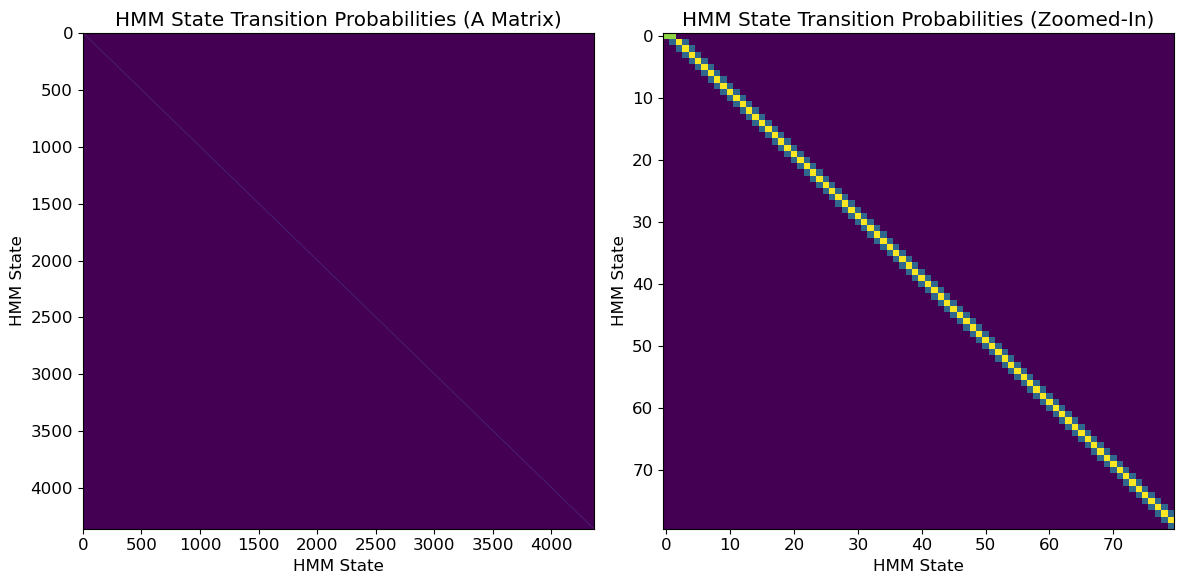

In [75]:
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(A_hmm,aspect='auto')
plt.ylabel('HMM State')
plt.xlabel('HMM State')
plt.title('HMM State Transition Probabilities (A Matrix)')

plt.subplot(1,2,2)
plt.imshow(A_hmm[0:80,0:80],aspect='auto')
plt.ylabel('HMM State')
plt.xlabel('HMM State')
plt.title('HMM State Transition Probabilities (Zoomed-In)')

plt.gcf().tight_layout()
plt.show()

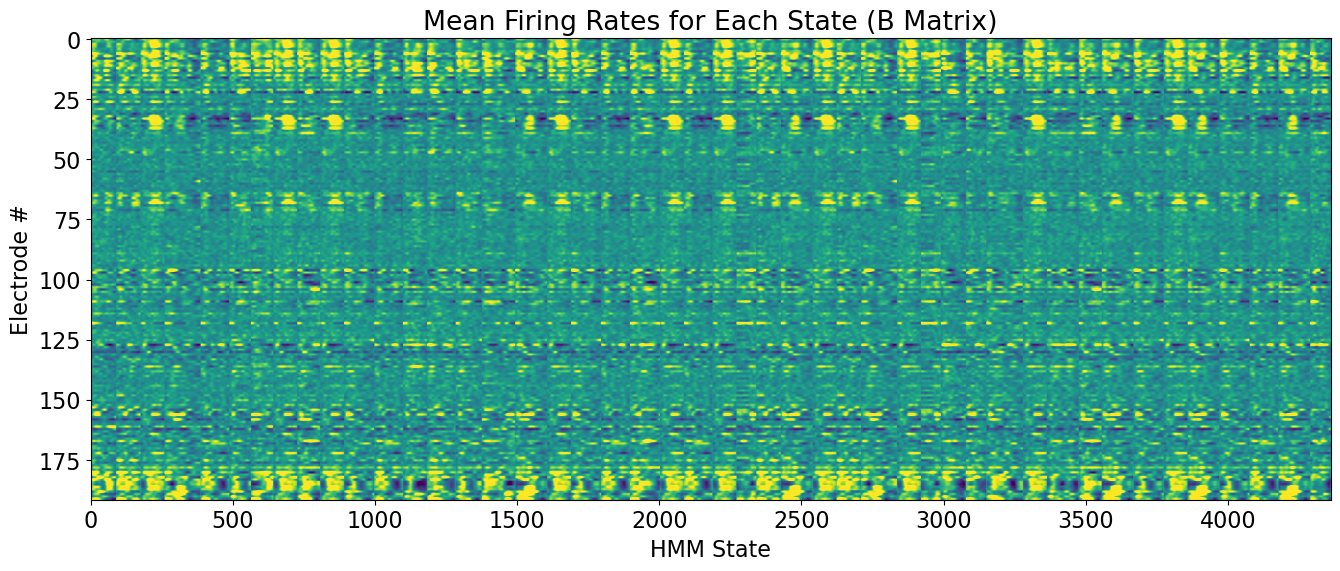

In [113]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,6))
plt.imshow(np.transpose(B_hmm),clim=[-0.5, 0.5],aspect='auto')
plt.ylabel('Electrode #')
plt.xlabel('HMM State')
plt.title('Mean Firing Rates for Each State (B Matrix)')
plt.show()

In [114]:
print('State Character Labels')
print(np.transpose(stateLabels).tolist())

State Character Labels
[['&', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', '&', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '&', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', 

In [118]:
#Prepare the neural data to be processed by the HMM by normalizing, smoothing and binning it.
neuralCube = sentenceData['neuralActivityCube'].astype(np.float64)

#subtract block-specific means from each trial 
#we use the means from the single letter data (since the templates also use this)
for b in range(sentenceData['blockList'].shape[0]):
    trialsFromThisBlock = np.squeeze(sentenceData['sentenceBlockNums']==sentenceData['blockList'][b])
    trialsFromThisBlock = np.argwhere(trialsFromThisBlock)
        
    closestIdx = np.argmin(np.abs(dat['blockList'].astype(np.int32) - sentenceData['blockList'][b].astype(np.int32)))
    blockMeans = dat['meansPerBlock'][closestIdx,:]
    
    neuralCube[trialsFromThisBlock,:,:] -= blockMeans[np.newaxis,np.newaxis,:]

#divide by standard deviation to normalize the units
neuralCube = neuralCube / dat['stdAcrossAllData'][np.newaxis,:,:]

#smooth neural activity (important!)
neuralCube = scipy.ndimage.gaussian_filter1d(neuralCube, 4.0, axis=1)

#select the neural activity for the example sentence and bin it 
obsRaw = neuralCube[sentenceIdx,0:sentenceData['numTimeBinsPerSentence'][sentenceIdx,0],:]

nHMMSizedBins = np.floor(obsRaw.shape[0]).astype(np.int32)
obs = np.zeros([nHMMSizedBins, obsRaw.shape[1]])
binIdx = np.arange(0, 1).astype(np.int32)
for x in range(nHMMSizedBins):
    obs[x,:] = np.mean(obsRaw[binIdx,:], axis=0)
    binIdx += 1

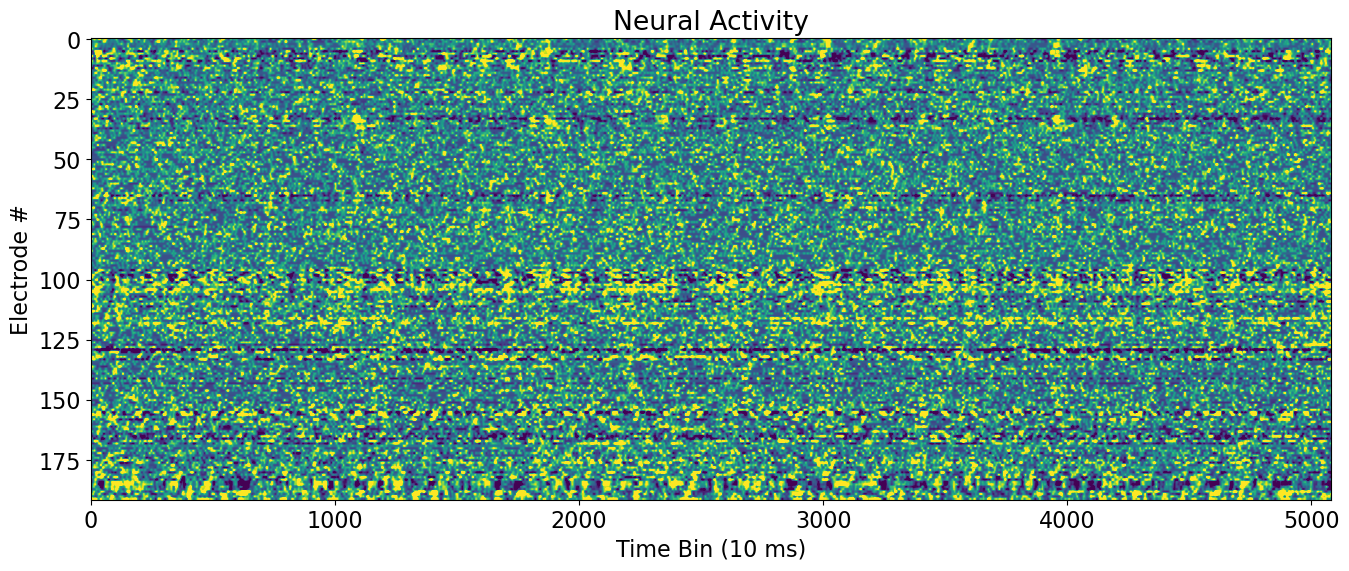

In [121]:
#Plot the neural activity that the HMM will process. 
plt.figure(figsize=(16,6))
plt.imshow(np.transpose(obs), aspect='auto', clim=[-0.5, 0.5])
plt.xlabel('Time Bin (10 ms)')
plt.ylabel('Electrode #')
plt.title('Neural Activity')
plt.show()

In [122]:
#Define the starting state probabilities for the HMM. The following gives a small chance of starting with a blank, or otherwise
#it begins with the first state of the first character.
startProb = np.zeros([A_hmm.shape[0]])
startProb[0] = blankProb
startProb[1] = 1 - startProb[0]

In [123]:
#For labeling long sentences, it can help to enforce that characters occur within a certain 
#time window defined by their lcoation in the sentence. This prevents pathological solutions 
#that place a large chunk of characters very close together. We implement this using 'probMask'.
#This mask is also used to enforce sentence termination (by allowing only the final states to occur at the last time step).

#During inference, 'probMask' is multiplied with the observation probabilities. 
#If it's zero for a given state and time step, then that state cannot appear at that time step.
probMask = np.zeros([obs.shape[0], A_hmm.shape[0]])

#Determine how big of a window we give each character, depending on sentence length
if len(sentence)==1:
    winLen = 1
elif len(sentence)<=10:
    winLen = 0.50
else:
    winLen = 0.30

#Now fill in probMask
for x in range(A_hmm.shape[0]):
    #first, get this state's character-level position in the sentence
    sl = stateLabelsSeq[x]
    
    #special logic for blank states (-1)
    if sl==-1:
        sl = stateLabelsSeq[x-1]
        
    #compute where this state should occur in normalized time
    timeFraction = sl/np.max(stateLabelsSeq)
        
    #compute the window of allowable time steps that this state can appear
    totalSteps = obs.shape[0]
    tIdx = np.arange(np.round(timeFraction*totalSteps - winLen*totalSteps),
                     np.round(timeFraction*totalSteps + winLen*totalSteps)).astype(np.int32)
    tIdx = tIdx[np.logical_and(tIdx>=0, tIdx<totalSteps)]
    
    probMask[tIdx, x] = 1
    
#sentence termination constraint (disallows all states at the last time step EXCEPT the final character state or blank)
probMask[-1, 0:-2] = 0

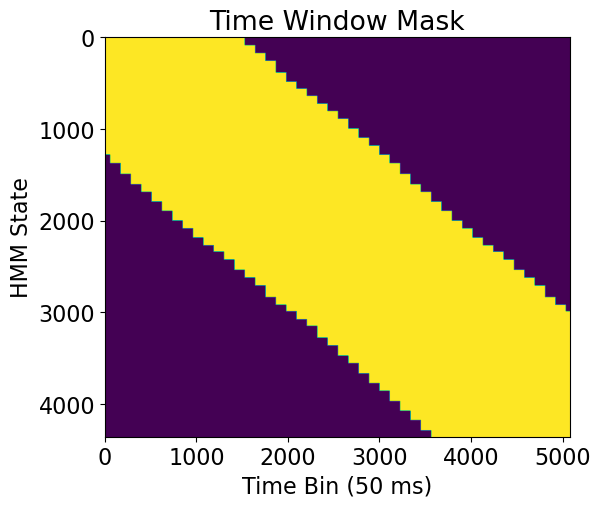

In [124]:
#Plot the probability mask (yellow region indicates band of accepted states for each time step)
plt.figure(figsize=(6,6))
plt.imshow(np.transpose(probMask))
plt.xlabel('Time Bin (50 ms)')
plt.ylabel('HMM State')
plt.title('Time Window Mask')
plt.show()

In [125]:
#Now do inference with the HMM using the forward-backward algorithm which gives, for each time step, the probability of each state
#occurring at that time step. 
#(see Chapter 13 of "Bishop, Christopher M. Pattern Recognition and Machine Learning. New York: Springer, 2011.")

#number of states in the HMM
numStates = A_hmm.shape[0] 

#number of time bins in the sentence plus one
L = obs.shape[0] + 1 

#For some sentences, the states don't propagate forward with high enough probability and don't reach the end of the sentence, 
#causing nans. To mitigate this issue, if we detect a failure, we relax the constraints by increasing the observation variance 
#and try again.
successfulCompletion = False

#with np.errstate(invalid='raise',divide='raise',over='raise'):
while not successfulCompletion:

    #Initialize the forward / backward probability vectors (fs, bs) and scaling factor (s).
    #fs = P(Xt | O1, ..., Ot)
    #bs ∝ P(Ot+1, ..., OT | Xt)
    #fs and bs are combined to compute P(Xt | O1, ... OT) ∝ P(Xt | O1, ..., Ot)P(Ot+1, ..., OT | Xt)

    fs = np.zeros([numStates, L])
    fs[:, 0] = startProb

    bs = np.ones([numStates, L])
    logBS = np.ones([numStates, L])

    s = np.zeros([L])
    s[0] = 1

    #forward pass
    for count in range(1, L):
        #multivariate normal observation probabilities P(Ot | Xt)
        squaredDiffTerm = -np.square(B_hmm-obs[count-1,:])/(2*diagVariance)
        gaussianEmissionProb = np.exp(np.sum(squaredDiffTerm, axis=1))

        #recursive computation of fs
        fs[:,count] = gaussianEmissionProb * np.matmul(np.transpose(A_hmm), fs[:,count-1]) * probMask[count-1,:]

        #scaling
        s[count] =  np.sum(fs[:,count])
        fs[:,count] =  fs[:,count]/s[count]   

    #backward pass
    for count in range(L-2,-1,-1):
        #multivariate normal observation probabilities P(Ot+1 | Xt+1)
        squaredDiffTerm = -np.square(B_hmm-obs[count,:])/(2*diagVariance)
        gaussianEmissionProb = np.exp(np.sum(squaredDiffTerm, axis=1))

        #recursive computation of bs
        bs[:,count] = np.matmul(A_hmm, bs[:,count+1] * gaussianEmissionProb * probMask[count,:])

        #scaling
        bs[:,count] = bs[:,count]/s[count+1]

    #final probabilities
    pSeq = np.sum(np.log(s))
    pStates = fs*bs

    #get rid of the first column
    pStates = pStates[:, 1:]

    if not np.any(np.isnan(pStates)):
        successfulCompletion = True
    else:
        #increase the variance a bit and try again
        print('Increasing variance to help states propagate to the end of the sentence.')
        diagVariance += 0.5

print('Forward-backward algorithm completed successfuly.')

Forward-backward algorithm completed successfuly.


/tmp/ipykernel_3549773/2178279643.py:5: RuntimeWarning: divide by zero encountered in log
  logProb = np.log(pStates[0:300, 0:300])


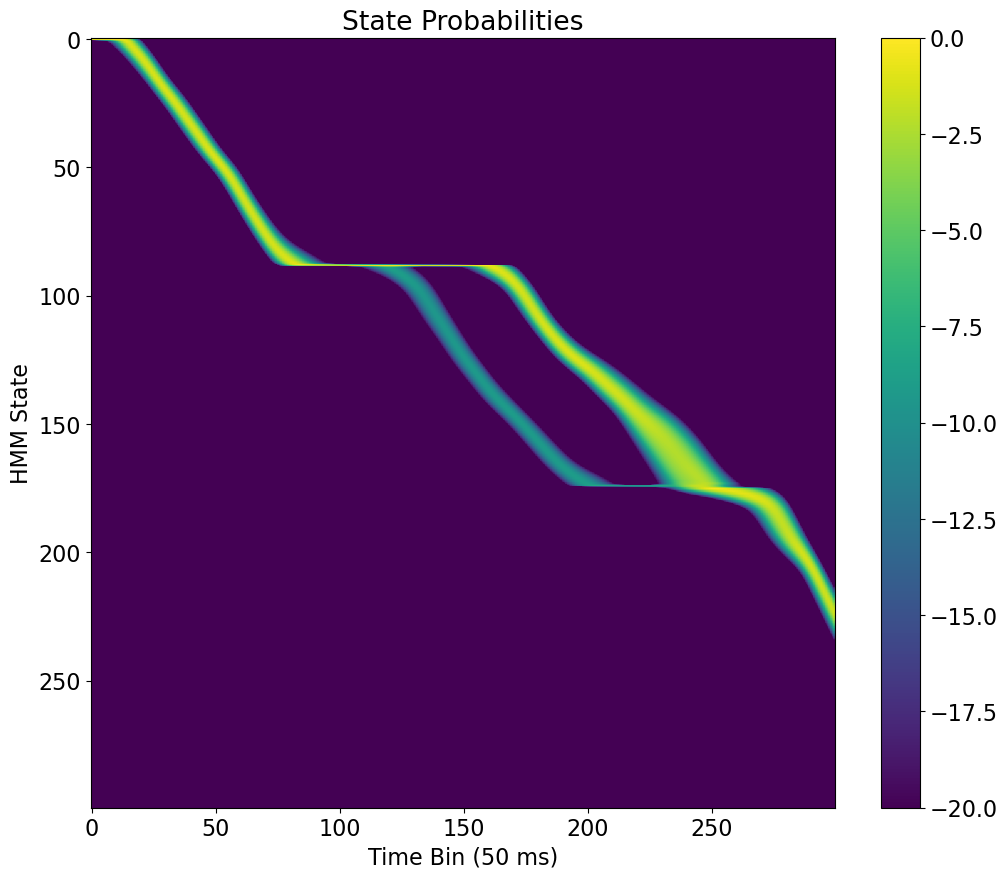

In [126]:
#Plot the log probabilities for each state over time. The path formed through the states shows an orderly progression through 
#the character sequence (as expected). Branches from the main path indicate alternative labelings.

#note that we convert negative infinity values into finite values for plotting (otherwise they appear white)
logProb = np.log(pStates[0:300, 0:300])
logProb[logProb==-np.inf] = -1000

plt.figure(figsize=(12,10))
plt.imshow(logProb,clim=[-20,0],aspect='auto')
plt.title('State Probabilities')
plt.xlabel('Time Bin (10 ms)')
plt.ylabel('HMM State')
plt.colorbar()
plt.show()

In [127]:
#The forward-backward algorithm gives state probabilities but not the most likely single sequence.
#We now use the Viterbi algorithm to find the most likely sequence of states, working with log probabilities
#to avoid numerical issues.

numStates = A_hmm.shape[0]
L = obs.shape[0]
logTR = np.log(A_hmm)

#pTR stores, for each state S and time step T, the previous state in the most likely path ending in S at time T.
#This can be used to backtrace the most likely path, beginning at the most likely state on the final time step. 
pTR = np.zeros([numStates,L])

#v stores, for each state, the probability of the most likely path that ends in that state.
v = np.log(startProb[:,np.newaxis])

#loop through each time step, updating pTR and v one step at a time
for count in range(L):
    #multivariate normal observation probabilities for this time step P(Ot | Xt)
    squaredDiffTerm = -np.square(B_hmm-obs[count,:])/(2*diagVariance)
    gaussianEmissionProb = np.sum(squaredDiffTerm, axis=1, keepdims=True)

    #recursively update v; for each state, find the best way to get there from the previous time step
    #and keep track of it in pTR
    tmpV = v + logTR
    maxIdx = np.argmax(tmpV, axis=0)
    maxVal = np.take_along_axis(tmpV, np.expand_dims(maxIdx, axis=0), axis=0)

    v = gaussianEmissionProb + np.transpose(maxVal) + np.log(probMask[count,:,np.newaxis])
    pTR[:,count] = maxIdx

#decide which of the final states is most probable
finalState = np.argmax(v)
logP = v[finalState]

#Now back trace through pTR to get the most likely state path
viterbiStates = np.zeros([L]).astype(np.int32)
viterbiStates[-1] = finalState
for count in range(L-2,0,-1):
    viterbiStates[count] = pTR[viterbiStates[count+1], count+1]

/tmp/ipykernel_3549773/4031690866.py:7: RuntimeWarning: divide by zero encountered in log
  logTR = np.log(A_hmm)
/tmp/ipykernel_3549773/4031690866.py:14: RuntimeWarning: divide by zero encountered in log
  v = np.log(startProb[:,np.newaxis])
/tmp/ipykernel_3549773/4031690866.py:28: RuntimeWarning: divide by zero encountered in log
  v = gaussianEmissionProb + np.transpose(maxVal) + np.log(probMask[count,:,np.newaxis])


/tmp/ipykernel_3549773/1356459368.py:2: RuntimeWarning: divide by zero encountered in log
  logProb = np.log(pStates[0:300, 0:300])


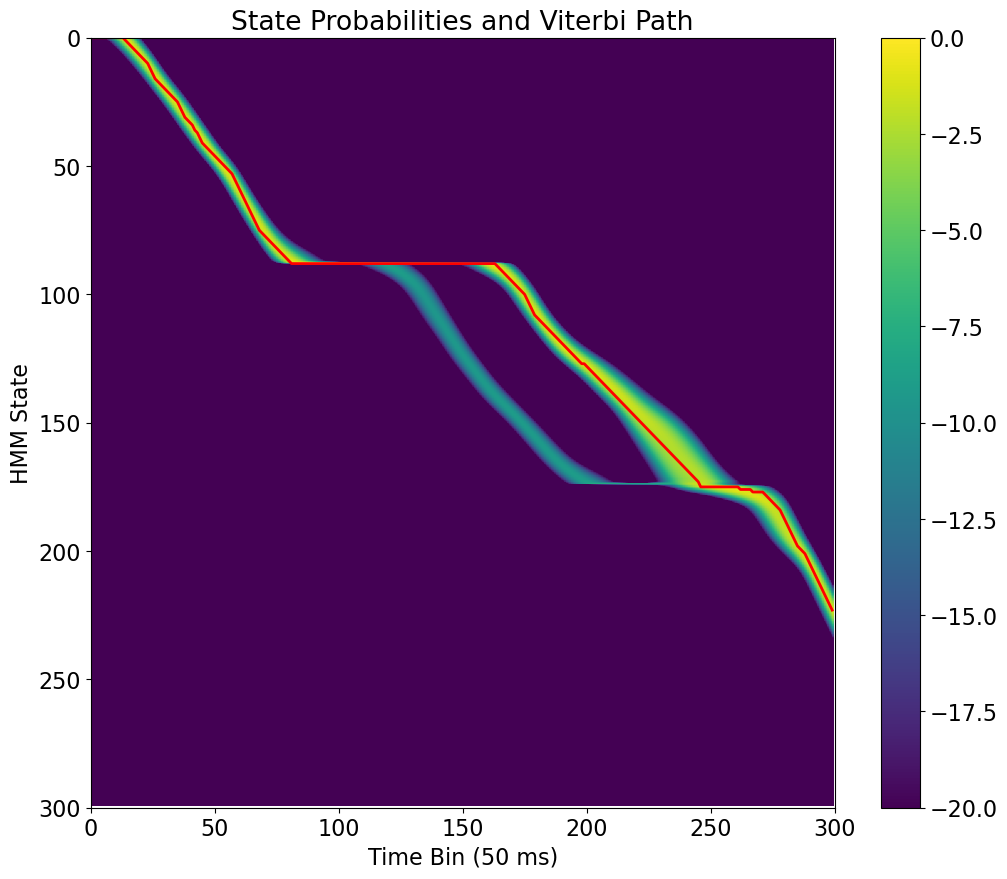

In [129]:
#Plot the Viterbi sequence of states with a red trace on top of the state probabilities.
logProb = np.log(pStates[0:300, 0:300])
logProb[logProb==-np.inf] = -1000

plt.figure(figsize=(12,10))
plt.imshow(logProb, clim=[-20,0], aspect='auto')
plt.plot(np.arange(0,300), viterbiStates[0:300],'-r',linewidth=2)
plt.xlim([0,300])
plt.ylim([0,300])

plt.xlabel('Time Bin (50 ms)')
plt.ylabel('HMM State')
plt.title('State Probabilities and Viterbi Path')

plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

In [130]:
#Get  character start times and character stretch factors from the Viterbi sequence of HMM states.
labeledStates = stateLabelsSeq[viterbiStates]

letterStarts = np.zeros([len(sentence),1])
letterStretches = np.zeros([len(sentence),1])
for x in range(len(sentence)):
    thisChar = np.argwhere(labeledStates[:,0]==x)
    letterStarts[x] = (thisChar[0]+1)*hmmBinSize-1
    letterStretches[x] = (len(thisChar)*hmmBinSize)/templates[sentence[x]].shape[0]

In [131]:
#In this next step, we refine the start times of each character by shifting them around a bit 
#until they lie on correlation hotspots
for c in range(len(sentence)):
    #generate a list of potential start times for this character
    possibleStart = np.arange(letterStarts[c]-50, letterStarts[c]+55, 5).astype(np.int32)
    possibleStart = possibleStart[possibleStart>=0]
    
    #don't allow start times that are too close to the previous character
    if c>0:
        possibleStart = possibleStart[possibleStart>=(letterStarts[c-1]+20)]
        
    possibleStretch = np.linspace(0.4, 1.5, 15)
    template = templates[sentence[c]]
    
    corrHeatmap = np.zeros([len(possibleStretch), len(possibleStart)])
    corrHeatmap[:] = -np.inf
    
    #compute correlation heatmap by correlating the template to the data at each stretch factor and start location
    for (stretch, stretchCount) in zip(possibleStretch, range(len(possibleStretch))):
        newX = np.linspace(0,1,int(np.round(template.shape[0]*stretch)))
        stretchedTemplate = np.zeros([len(newX), template.shape[1]])
        for colIdx in range(template.shape[1]):
            stretchedTemplate[:,colIdx] = np.interp(newX, np.linspace(0,1,template.shape[0]), template[:,colIdx])
            
        for (startIdx, startCount) in zip(possibleStart, range(len(possibleStart))):
            #don't evaluate possibilities that intersect the previous template
            if c>0:
                prevTemplateEnd = letterStarts[c-1] + letterStretches[c-1]*templates[sentence[c-1]].shape[0]
                if startIdx < (prevTemplateEnd-10):
                    continue
            
            #don't evaluate possibilities that intersect the next template
            if c<len(sentence)-1:
                thisTemplateEnd = startIdx + stretchedTemplate.shape[0]
                if thisTemplateEnd > letterStarts[c+1]+10:
                    continue
                    
            #don't evaluate possibilities that lie outside of the data range
            stepIdx = np.arange(startIdx, startIdx + stretchedTemplate.shape[0]).astype(np.int32)
            if stepIdx[-1]>=(obsRaw.shape[0]):
                continue
                
            #compute correlation between this template and the data
            msDat = obsRaw[stepIdx,:] - np.mean(obsRaw[stepIdx,:], axis=0, keepdims=True)
            msST = stretchedTemplate - np.mean(stretchedTemplate, axis=0, keepdims=True)
            
            normDat = np.sqrt(np.sum(np.square(msDat), axis=0))
            normST = np.sqrt(np.sum(np.square(msST), axis=0))
                            
            corrCoeff = np.sum(msDat * msST, axis=0) / (normDat * normST)
            corrHeatmap[stretchCount, startCount] = np.nanmean(corrCoeff)

    #select character stretch factors and start times based on the heatmap hotspot
    maxIdx = np.argmax(corrHeatmap)
    maxIdx = np.unravel_index(maxIdx, corrHeatmap.shape)
    
    letterStretches[c] = possibleStretch[maxIdx[0]]
    letterStarts[c] = possibleStart[maxIdx[1]]

/tmp/ipykernel_3549773/999933326.py:50: RuntimeWarning: invalid value encountered in divide
  corrCoeff = np.sum(msDat * msST, axis=0) / (normDat * normST)


In [132]:
#Finally, we make character heatmaps to validate successful labeling. This is just a qualitative way to visualize what's
#going on (i.e. it's a useful sanity check). The heatmaps are made by correlating a character template to the data with
#different start times and contraction/dilation of the template. If the HMM labeling process worked well, the 
#inferred character start times should lie on a hotspot. They often do, but not always.
heatmapList = []

for x in range(len(sentence)):
    possibleStart = np.arange(letterStarts[x]-200, letterStarts[x]+200, 10).astype(np.int32)
    possibleStretch = np.linspace(0.4,1.5,15);
    thisTemplate = templates[sentence[x]]
    
    corrHeatmap = np.zeros([len(possibleStretch), len(possibleStart)])

    for (stretch, stretchCount) in zip(possibleStretch, range(len(possibleStretch))):
        #make new dilated/contracted template
        newX = np.linspace(0,1,int(thisTemplate.shape[0]*stretch))
        stretchedTemplate = np.zeros([len(newX), thisTemplate.shape[1]])
        for colIdx in range(thisTemplate.shape[1]):
            stretchedTemplate[:,colIdx] = np.interp(newX, np.linspace(0,1,thisTemplate.shape[0]), thisTemplate[:,colIdx])
            
        for (startIdx, startCount) in zip(possibleStart, range(len(possibleStart))):
            #check if template falls oustide of the data boundaries
            if startIdx < 0:
                continue
            if startIdx + stretchedTemplate.shape[0] >= obsRaw.shape[0]:
                continue
                
            #compute correlation between this template and the data
            stepIdx = np.arange(startIdx, startIdx+stretchedTemplate.shape[0]).astype(np.int32)
            
            msDat = obsRaw[stepIdx,:] - np.mean(obsRaw[stepIdx,:], axis=0, keepdims=True)
            msST = stretchedTemplate - np.mean(stretchedTemplate, axis=0, keepdims=True)
            
            normDat = np.sqrt(np.sum(np.square(msDat), axis=0))
            normST = np.sqrt(np.sum(np.square(msST), axis=0))
            
            corrCoeff = np.sum(msDat * msST, axis=0) / (normDat * normST)
            corrHeatmap[stretchCount, startCount] = np.nanmean(corrCoeff)
            
    heatmapList.append(corrHeatmap)

/tmp/ipykernel_3549773/644063529.py:37: RuntimeWarning: invalid value encountered in divide
  corrCoeff = np.sum(msDat * msST, axis=0) / (normDat * normST)


/home/cmcnabb/mambaforge/envs/hw/lib/python3.10/site-packages/matplotlib/axes/_base.py:2532: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xys = np.asarray(xys)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

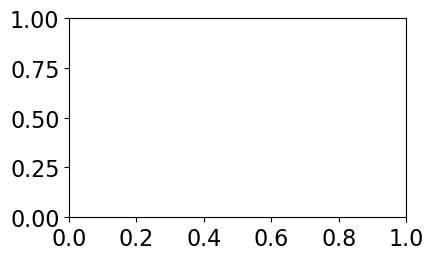

In [133]:
#Plot the heatmaps generated above for the first 16 characters of the sentence. For each heatmap, the x-axis is time (in seconds)
#and the y-axis is the 'stretch factor' (linear time dilation/contraction)
plt.rcParams.update({'font.size': 16})

plotIdx = np.arange(0, 20).astype(np.int32)

plt.figure(figsize=(20,15))
for p in range(len(plotIdx)):
    plt.subplot(5,4,p+1)
    
    x = plotIdx[p]
    plt.imshow(heatmapList[x], aspect='auto', clim=[-0.1, 0.15], 
               extent=[letterStarts[x]/100-2, letterStarts[x]/100+2, 1.5, 0.4])
    
    plt.plot(letterStarts[x]/100, letterStretches[x],'kX',markersize=12)

    plt.gca().invert_yaxis()
    plt.title(sentence[x] + ' (' + str(letterStarts[x,0]/100) + ' s)')
    
plt.gcf().suptitle('Character Labeling Heatmaps',y=1.02)
plt.gcf().tight_layout()
plt.show()

In [134]:
#Finally, we construct the time series 'targets' used to train the RNN. The RNN is trained using supervised learning to 
#produce the following two outputs: a character probability vector with a one-hot encoding of the current character, 
#and a binary'new character' signal which briefly goes high at the start of any new character. 

#Note that we also produce an 'ignoreError' vector which describes, for each time step, whether the cost function should ignore
#any errors at that time step. We use this feature to prevent the RNN from being pnealized for errors that occur at the very
#start of the trial, before T5 has written any character yet (if the HMM has labeled this as a 'blank' state).

charProbTarget = np.zeros([obsRaw.shape[0], len(charDef['charList'])])
charStartTarget = np.zeros([obsRaw.shape[0], 1])
ignoreErrorHere = np.zeros([obsRaw.shape[0], 1])

for x in range(len(sentence)):
    #(1) one-hot encoding of the 'current' (or most recently started) character
    
    #first get the time steps to fill
    if x<(len(sentence)-1):
        #not the last character - extend until next character
        stepIdx = np.arange(letterStarts[x], letterStarts[x+1]).astype(np.int32)
    else:
        #last character - extend until end of sentence
        stepIdx = np.arange(letterStarts[x], obsRaw.shape[0]).astype(np.int32)
        
    #now fill in these time steps with a '1' for the given character
    charIdx = np.squeeze(np.argwhere(np.array(charDef['charListAbbr'])==sentence[x]))
    charProbTarget[stepIdx, charIdx] = 1
    
    #(2) character start signal that goes high for the first 200 ms of each new character
    stepIdx = np.arange(letterStarts[x], letterStarts[x]+21).astype(np.int32)
    charStartTarget[stepIdx] = 1
        
#Finally, we fill in the very beginning (which could be a blank) with the first character.
#Also, we mark this time period as something to be 'ignored', since there is no way for the RNN to correctly
#guess that these time steps belong to this character (because is hasn't been written yet).

charIdx = np.squeeze(np.argwhere(np.array(charDef['charListAbbr'])==sentence[0]))
charProbTarget[0:letterStarts[0,0].astype(np.int32), charIdx] = 1
ignoreErrorHere[0:letterStarts[0,0].astype(np.int32)] = 1

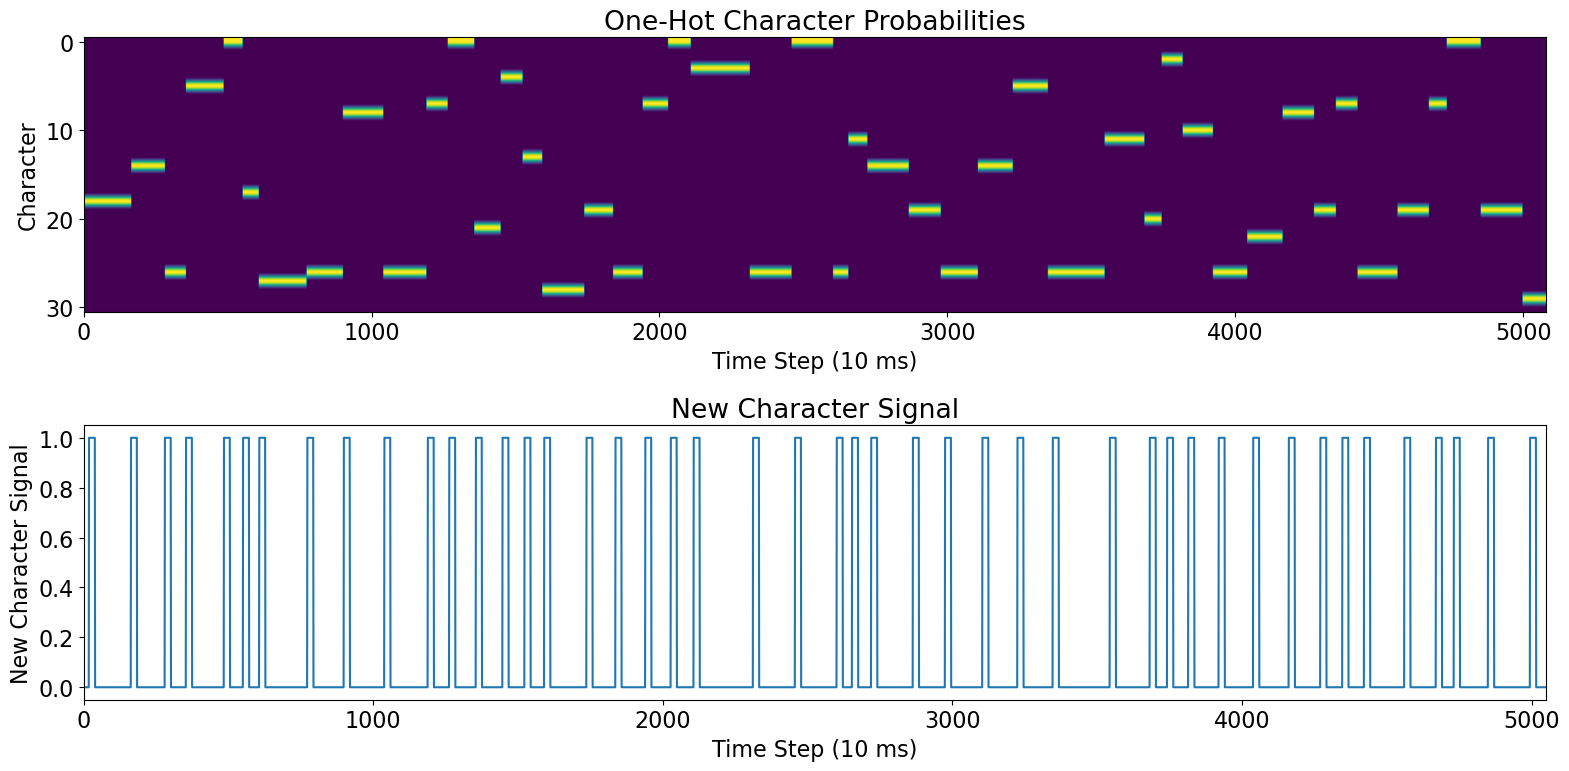

In [136]:
#Plot the RNN targets for this sentence
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
plt.imshow(np.transpose(charProbTarget), aspect='auto')
plt.xlabel('Time Step (10 ms)')
plt.ylabel('Character')
plt.title('One-Hot Character Probabilities')

plt.subplot(2,1,2)
plt.plot(charStartTarget)
plt.xlabel('Time Step (10 ms)')
plt.ylabel('New Character Signal')
plt.title('New Character Signal')
plt.xlim([0, 5050])

plt.gcf().tight_layout()
plt.show()